# Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
import tensorflow as tf
import pickle
from sklearn import model_selection
from tensorflow.keras.models import load_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn.svm import SVR
from numpy import arange
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from decimal import Decimal
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from scipy.interpolate import interp1d
#from google.colab import drive
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, LSTM
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from applicability_domain import ApplicabilityDomainDetector
from sklearn.metrics import mean_squared_error as mse
import scipy.stats
from scipy.stats import uniform
from sklearn import tree
from sklearn.ensemble import AdaBoostRegressor
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
from sklearn.preprocessing import QuantileTransformer
import seaborn as sns
from scipy.optimize import minimize, shgo
from scipy import optimize
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout, LayerNormalization, MultiHeadAttention, Add
import os

# Encoder

In [2]:
def encoder(num):
    num=int(num)
    list_of_digits= (bin(num).replace("0b", "").zfill(4))
    A=int(list_of_digits[0])
    B=int(list_of_digits[1])
    C=int(list_of_digits[2])
    D=int(list_of_digits[3])
    if num==1:
        out=4*(np.array([A,B,C,D]).reshape(1,4))
    elif num==2:
        out=5*(np.array([A,B,C,D]).reshape(1,4))
    elif num==3:
        out=1*(np.array([A,B,C,D]).reshape(1,4))
    elif num==4:
        out=1*(np.array([A,B,C,D]).reshape(1,4))
    elif num==5:
        out=4*(np.array([A,B,C,D]).reshape(1,4))
    elif num==6:
        out=3*(np.array([A,B,C,D]).reshape(1,4))
    elif num==7:
        out=2*(np.array([A,B,C,D]).reshape(1,4))
    elif num==8:
        out=2*(np.array([A,B,C,D]).reshape(1,4))
    elif num==9:
        out=3*(np.array([A,B,C,D]).reshape(1,4))
    elif num==10:
        out=2*(np.array([A,B,C,D]).reshape(1,4))
    elif num==11:
        out=2*(np.array([A,B,C,D]).reshape(1,4))
    elif num==12:
        out=3*(np.array([A,B,C,D]).reshape(1,4))
    elif num==13:
        out=4*(np.array([A,B,C,D]).reshape(1,4))
    return out

def filt(Xinn):
    Xin=Xinn.copy()
    for i in range(len(Xin)):
        if (Xin[i, 3]==2 and Xin[i, 4]==0 and Xin[i, 5]==2 and Xin[i, 6]==0): # as ID=7 and ID=10 are actually the same
            Xin[i, 3]=0 
            Xin[i, 4]=2 
            Xin[i, 5]=2 
            Xin[i, 6]=2
    for j in range(len(Xin)):
        if (Xin[j, 3]==4 and Xin[j, 4]==4 and Xin[j, 5]==0 and Xin[j, 6]==4): # as ID=5 and ID=13 are actually the same
            Xin[j, 3]=0 
            Xin[j, 4]=4 
            Xin[j, 5]=0
            Xin[j, 6]=4
    return Xin

def fix(xinp,param_values):
    if param_values[xinp,3]==13: # as ID=5 and ID=13 are actually the same
        idfixed=5
    elif param_values[xinp,3]==10: # as ID=7 and ID=10 are actually the same
        idfixed=7
    else:
        idfixed=param_values[xinp,3]
    return idfixed

# Setup of Figures

In [3]:
xw=5
yw=5
dpi=400
csfont = {'fontname':'Times New Roman'}
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["legend.loc"] = "lower right"

# Read data

In [4]:
csv_file_name = "Data\Transient\TRD"
header_list = ["A","B","C","D","E","F","G","H","I","J","K"]
data = pd.read_csv('{file_name}.csv'.format(file_name = csv_file_name), names=header_list).replace('?', np.NaN).dropna()
X = data.get(["A","B","D","E","F","G","H"])
y = data.get(["I","J"])
X=np.array(X)
X=filt(X)
y=np.array(y)
yt=y[:,0].reshape(-1,1)
xxxxx=X

In [5]:
meanX=np.mean(X, axis=0)
meany=np.mean(y, axis=0)
stdX=np.std(X, axis=0)
stdy=np.std(y, axis=0)
minX=np.min(X, axis=0)
maxX=np.max(X, axis=0)
miny=np.min(y, axis=0)
maxy=np.max(y, axis=0)
Xn=2*((X-minX)/(maxX-minX))-1
yn=2*((y-miny)/(maxy-miny))-1
Xs = (X-meanX)/stdX
ys = (y-meany)/stdy
yts = ys[:,0].reshape(-1,1)

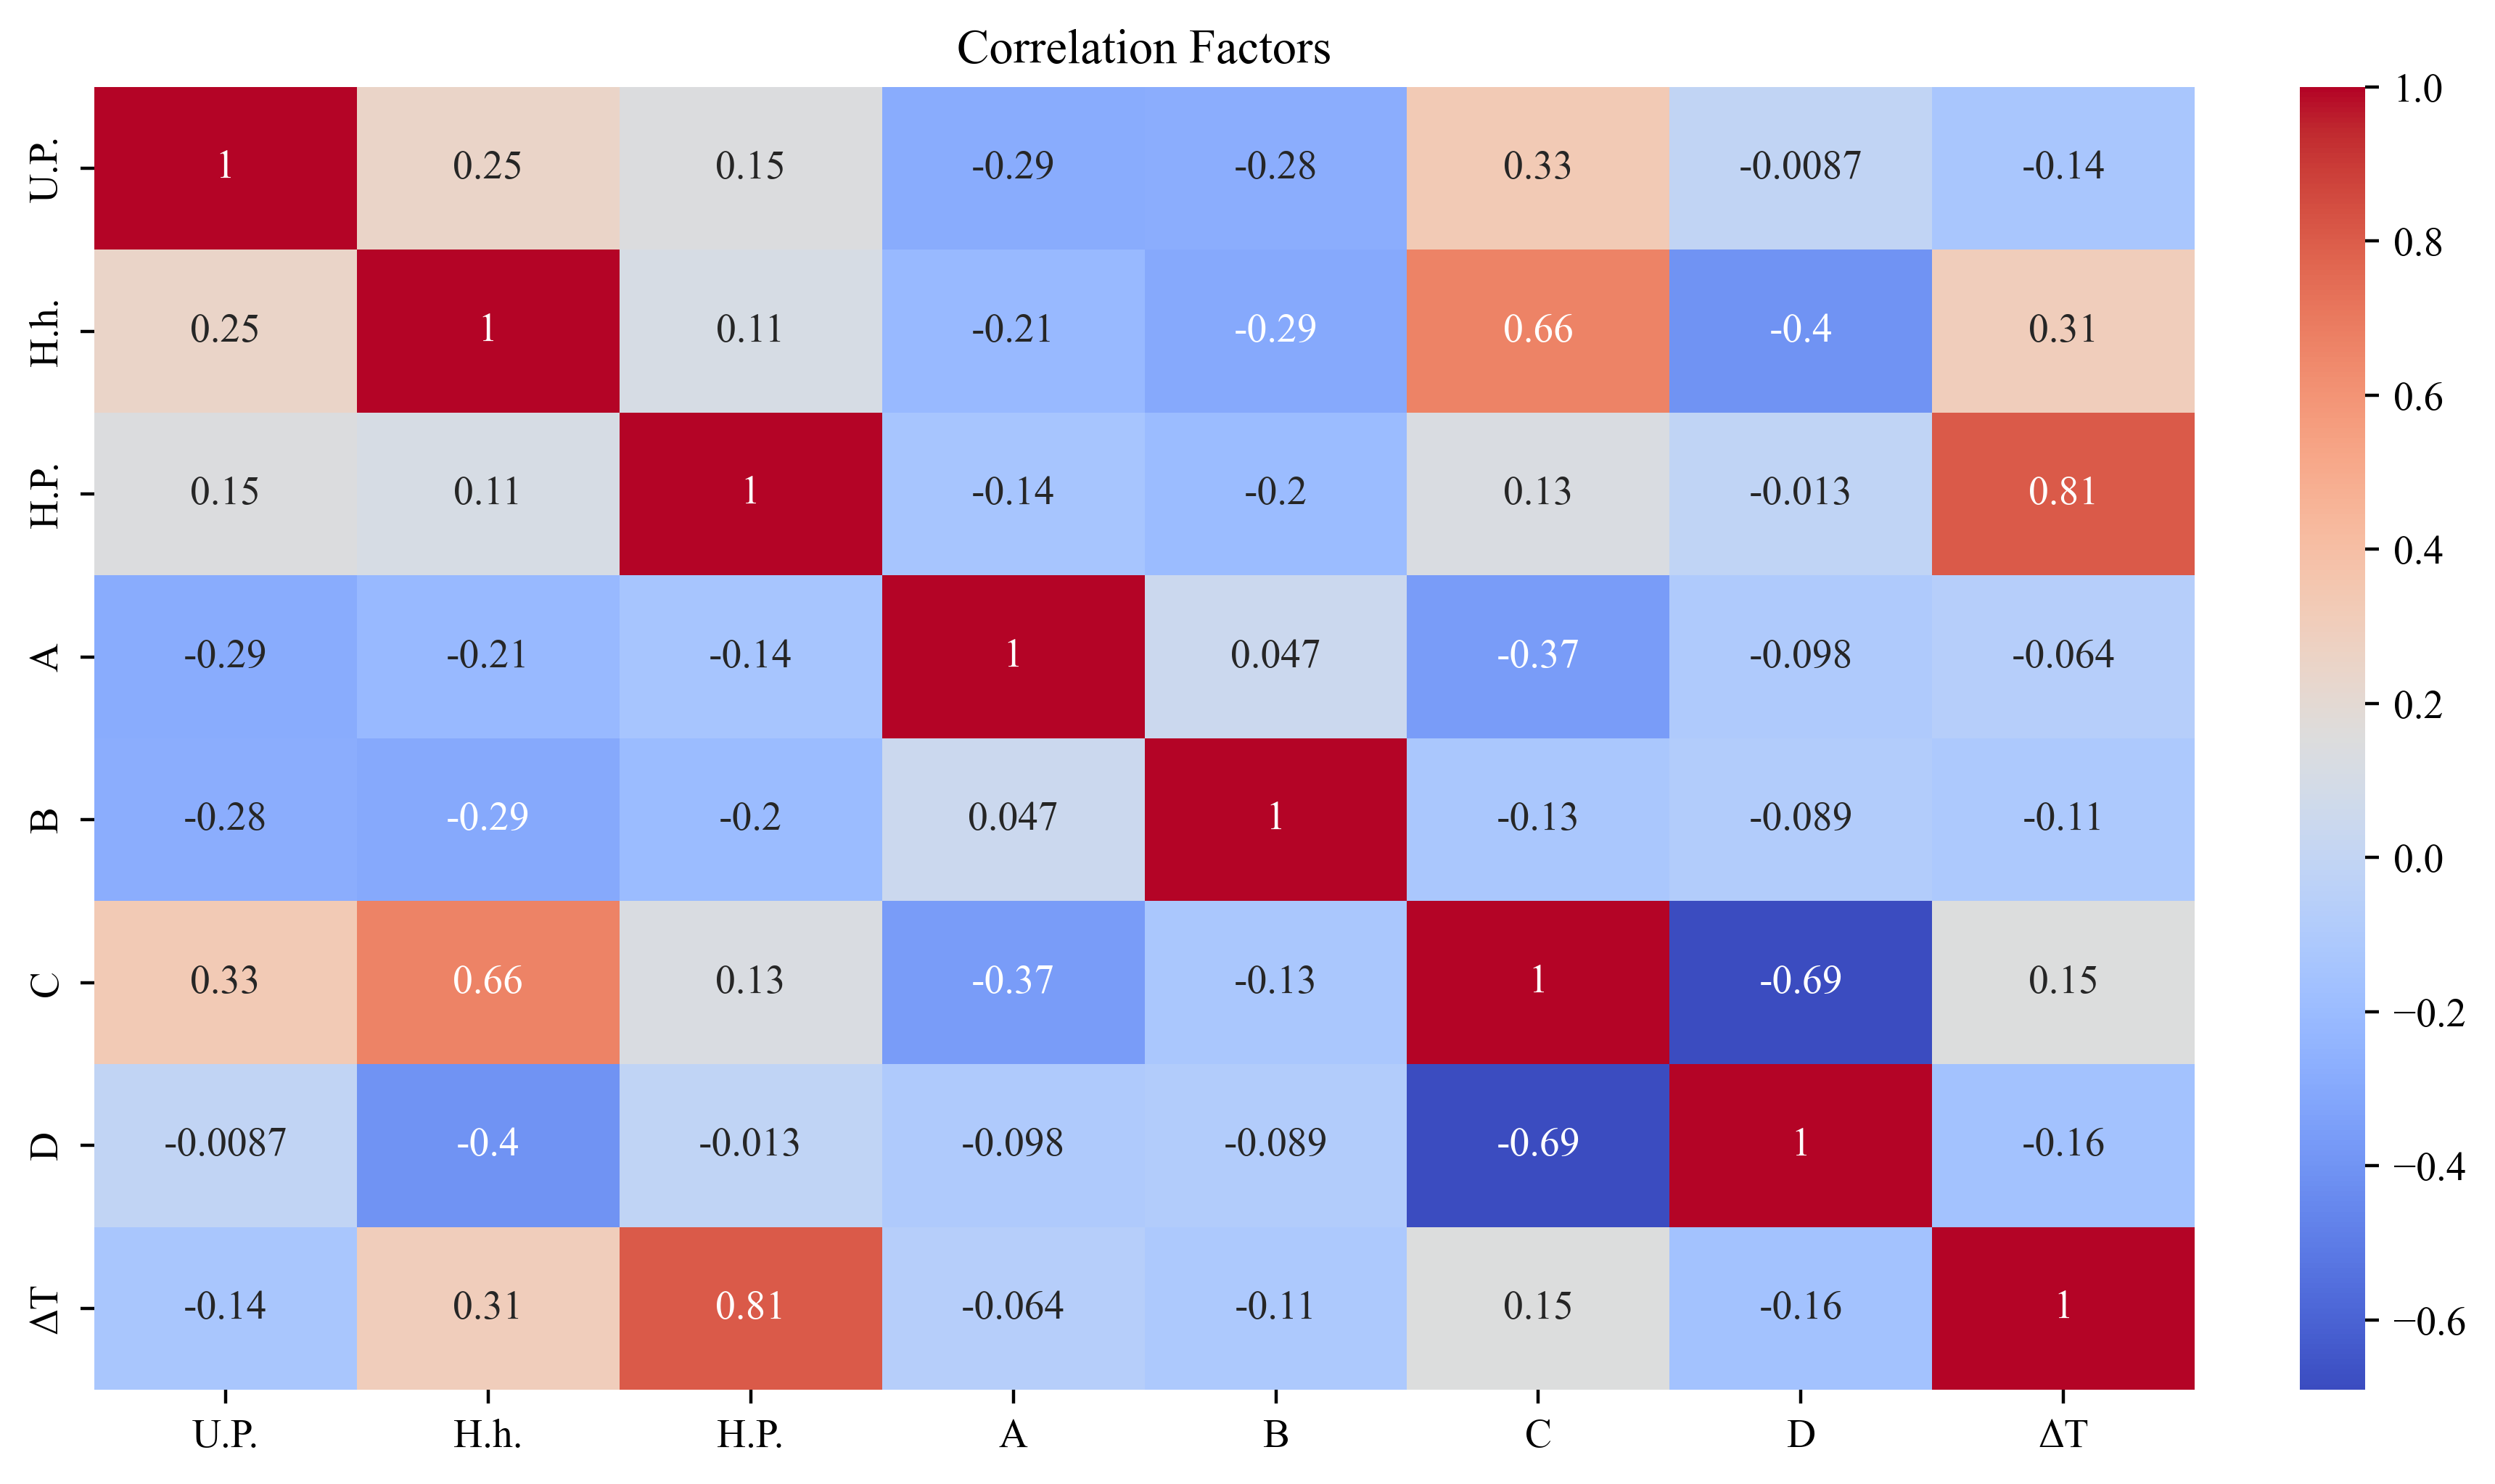

In [6]:
# Calculate the correlation matrix
header_list = ['U.P.',	'H.h.',	'H.P.','A','B','C','D',u'ΔT']
df=pd.DataFrame(np.column_stack((Xs,yts)),columns=header_list)
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(facecolor = 'white',figsize=(1.7*xw,yw),dpi=dpi,layout='constrained')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Factors')
plt.show()

In [6]:
csv_file_name = "Data\CML_TRAIN"
header_list = ["A","B","C","D","E","F","G","H"]
data = pd.read_csv('{file_name}.csv'.format(file_name = csv_file_name), names=header_list).replace('?', np.NaN).dropna()
X = data.get(["A","B","C","D","E","F","G"])
y = data.get(["H"])
Xts_train=np.array(X)
yts_train=np.array(y)

csv_file_name = "Data\CML_TEST"
header_list = ["A","B","C","D","E","F","G","H"]
data = pd.read_csv('{file_name}.csv'.format(file_name = csv_file_name), names=header_list).replace('?', np.NaN).dropna()
X = data.get(["A","B","C","D","E","F","G"])
y = data.get(["H"])
Xts_test=np.array(X)
yts_test=np.array(y)

csv_file_name = "Data\CNN_TRAIN"
header_list = ["A","B","C","D","E","F","G","H"]
data = pd.read_csv('{file_name}.csv'.format(file_name = csv_file_name), names=header_list).replace('?', np.NaN).dropna()
xcxc = data.get(["A","B","C","D","E","F","G"])
ycyc = data.get(["H"])
X_traincnn=np.array(xcxc).reshape(xcxc.shape[0], xcxc.shape[1],1)
y_traincnn=np.array(ycyc).reshape(-1,1)

csv_file_name = "Data\CNN_TEST"
header_list = ["A","B","C","D","E","F","G","H"]
data = pd.read_csv('{file_name}.csv'.format(file_name = csv_file_name), names=header_list).replace('?', np.NaN).dropna()
xcxc = data.get(["A","B","C","D","E","F","G"])
ycyc = data.get(["H"])
X_testcnn=np.array(xcxc).reshape(xcxc.shape[0], xcxc.shape[1],1)
y_testcnn=np.array(ycyc).reshape(-1,1)

csv_file_name = "Data\CNN_VAL"
header_list = ["A","B","C","D","E","F","G","H"]
data = pd.read_csv('{file_name}.csv'.format(file_name = csv_file_name), names=header_list).replace('?', np.NaN).dropna()
xcxc = data.get(["A","B","C","D","E","F","G"])
ycyc = data.get(["H"])
X_valcnn=np.array(xcxc).reshape(xcxc.shape[0], xcxc.shape[1],1)
y_valcnn=np.array(ycyc).reshape(-1,1)

# y=yts_train
# X=Xts_train

# Train CNN

In [8]:
device_name= tf.test.gpu_device_name()
print(device_name)

In [13]:
with tf.device(device_name):
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(Xs.shape[1],1)))
  model.add(Conv1D(filters=64, kernel_size=2, activation="relu"))
  model.add(Flatten())
  model.add(Dense(units=64, activation="relu"))
  model.add(Dense(units=16, activation="relu"))
  model.add(Dense(units=4, activation="relu"))
  model.add(Dense(1, activation="linear"))

In [14]:
with tf.device(device_name):
  model.compile(  optimizer='adam', 
                  loss='mean_squared_error', 
                  metrics=['mean_absolute_error'])
  model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 32)             128       
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 64)             4160      
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                16448     


                                                                 
 dense_5 (Dense)             (None, 16)                1040      
                                                                 
 dense_6 (Dense)             (None, 4)                 68        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 21849 (85.35 KB)
Trainable params: 21849 (85.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_traincnn, 
            y_traincnn, 
            epochs=1000,
            validation_data=(X_valcnn, y_valcnn),
            verbose=0)
print('First test scores:  ',model.evaluate(X_testcnn, y_testcnn, verbose=0))

First test scores:   [0.07361497730016708, 0.16306138038635254]


In [ ]:
filename = 'Models\CNN.h5'
if os.path.exists(filename):
    load_model('Models\CNN.h5')
else:
    model.save(filename)

In [65]:
MAE = history.history['mean_absolute_error']
val_MAE = history.history['val_mean_absolute_error']
MSE = history.history['loss']
val_MSE = history.history['val_loss']
epochs = range(len(MAE))

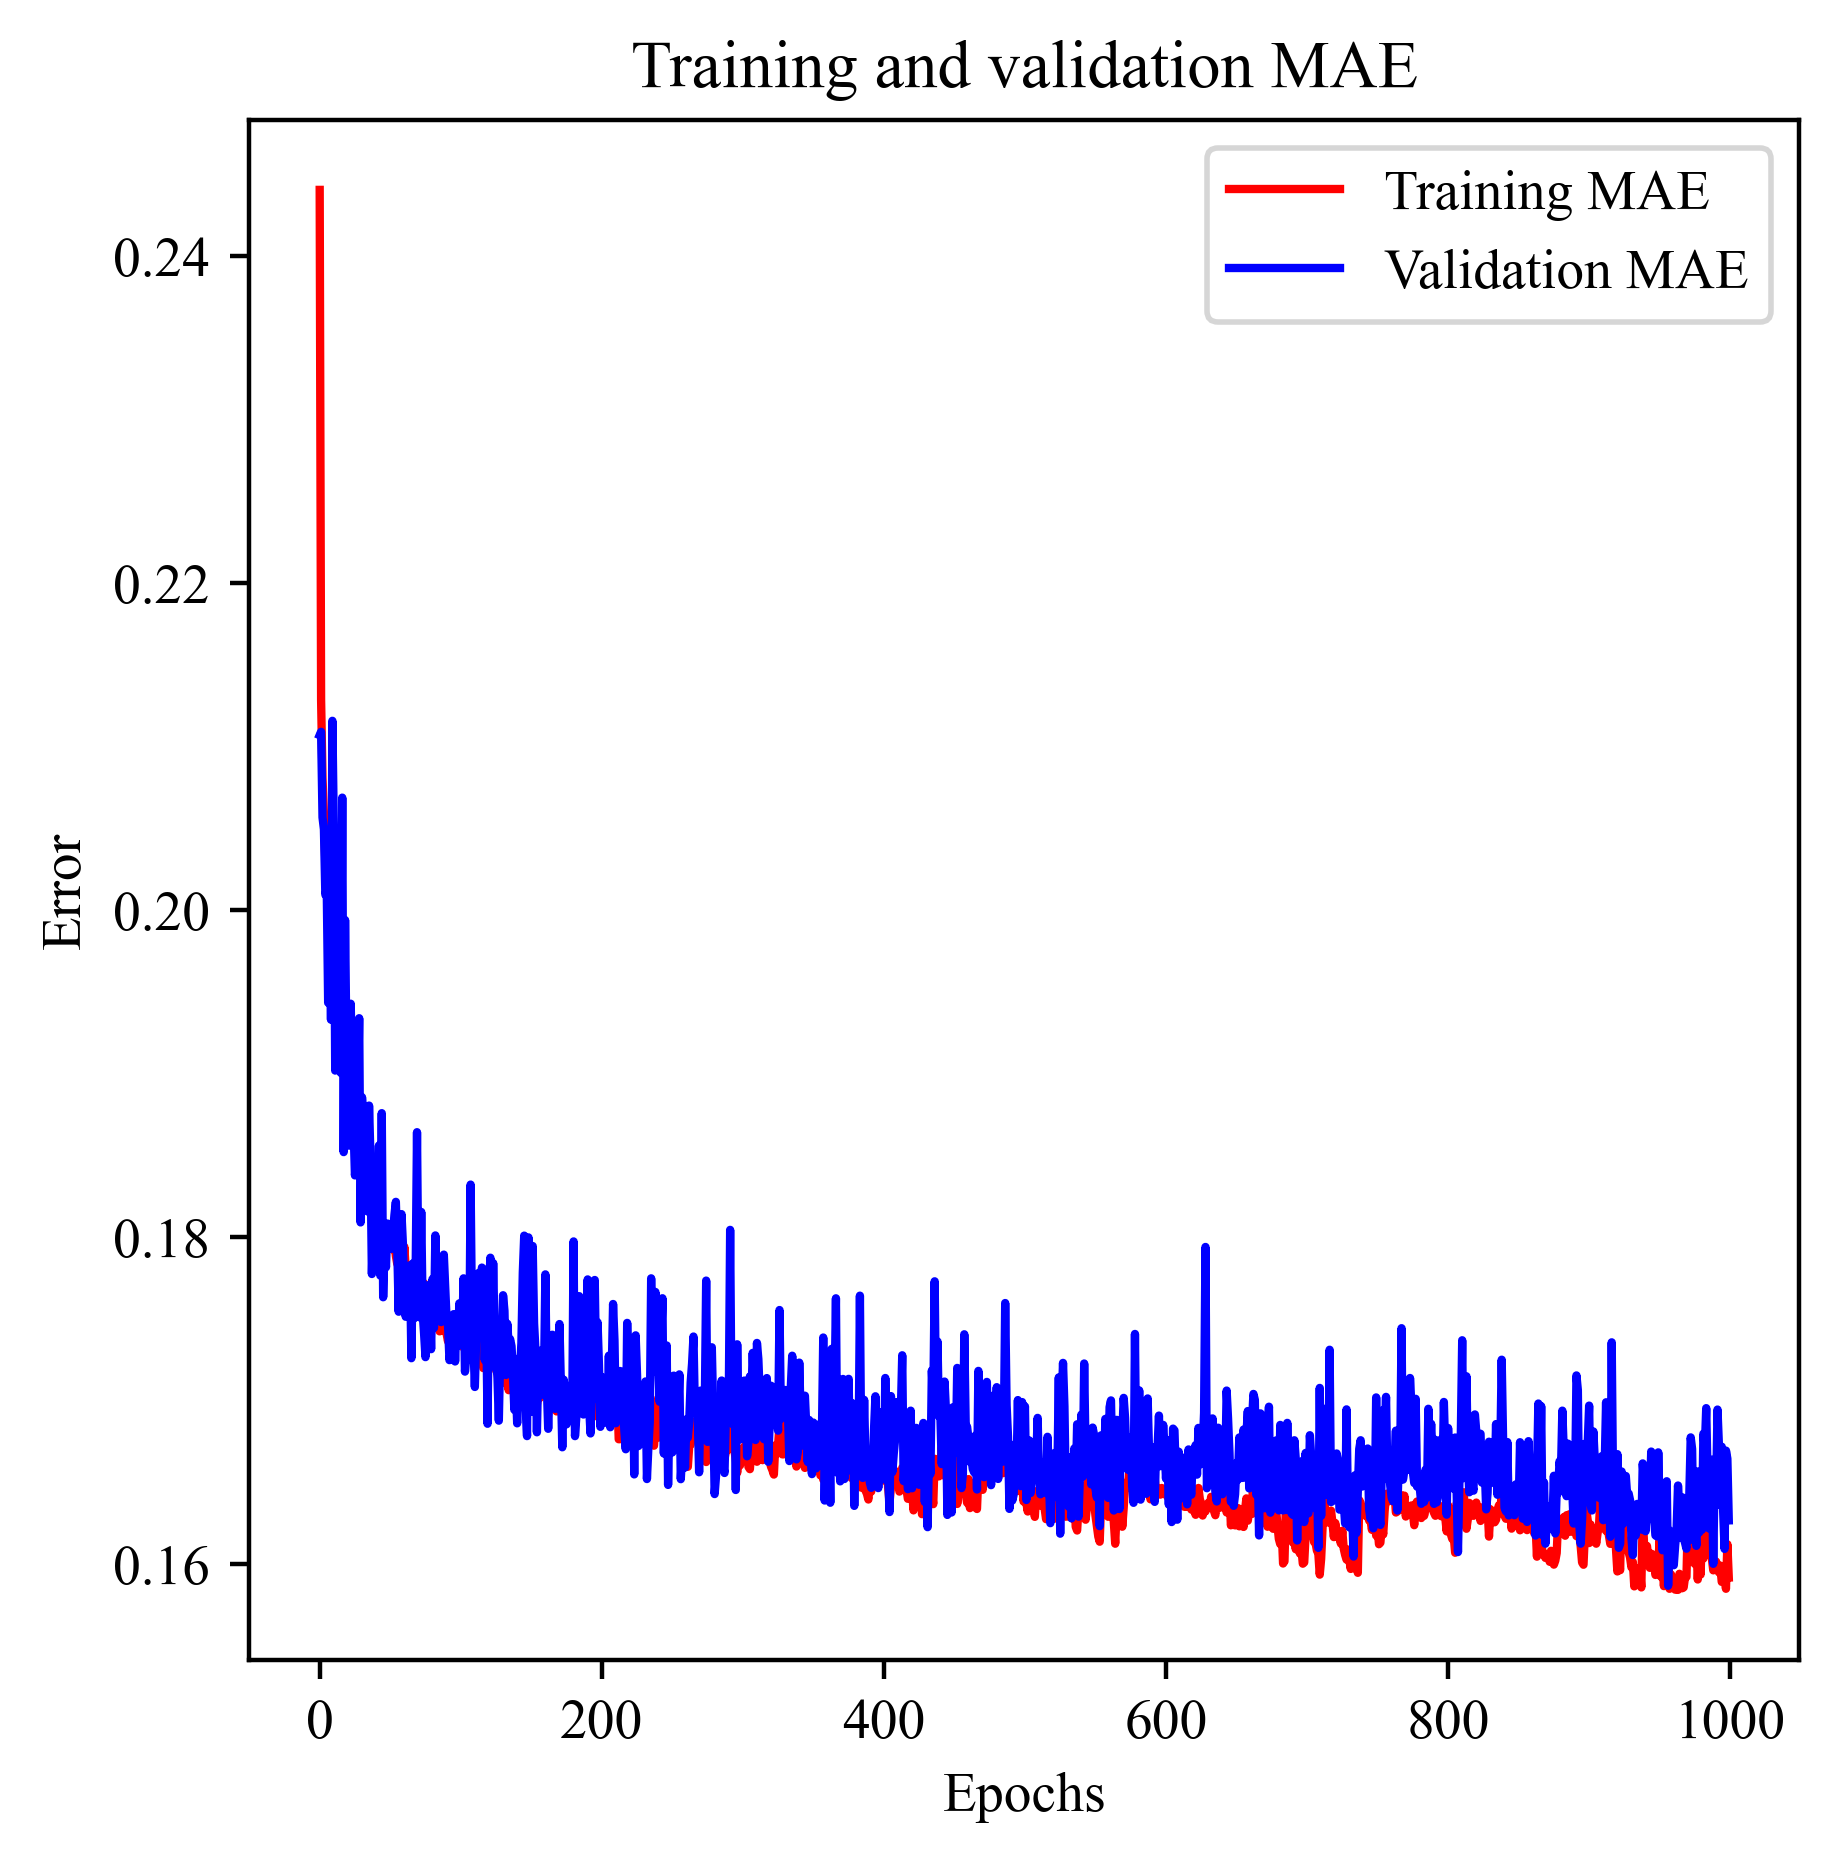

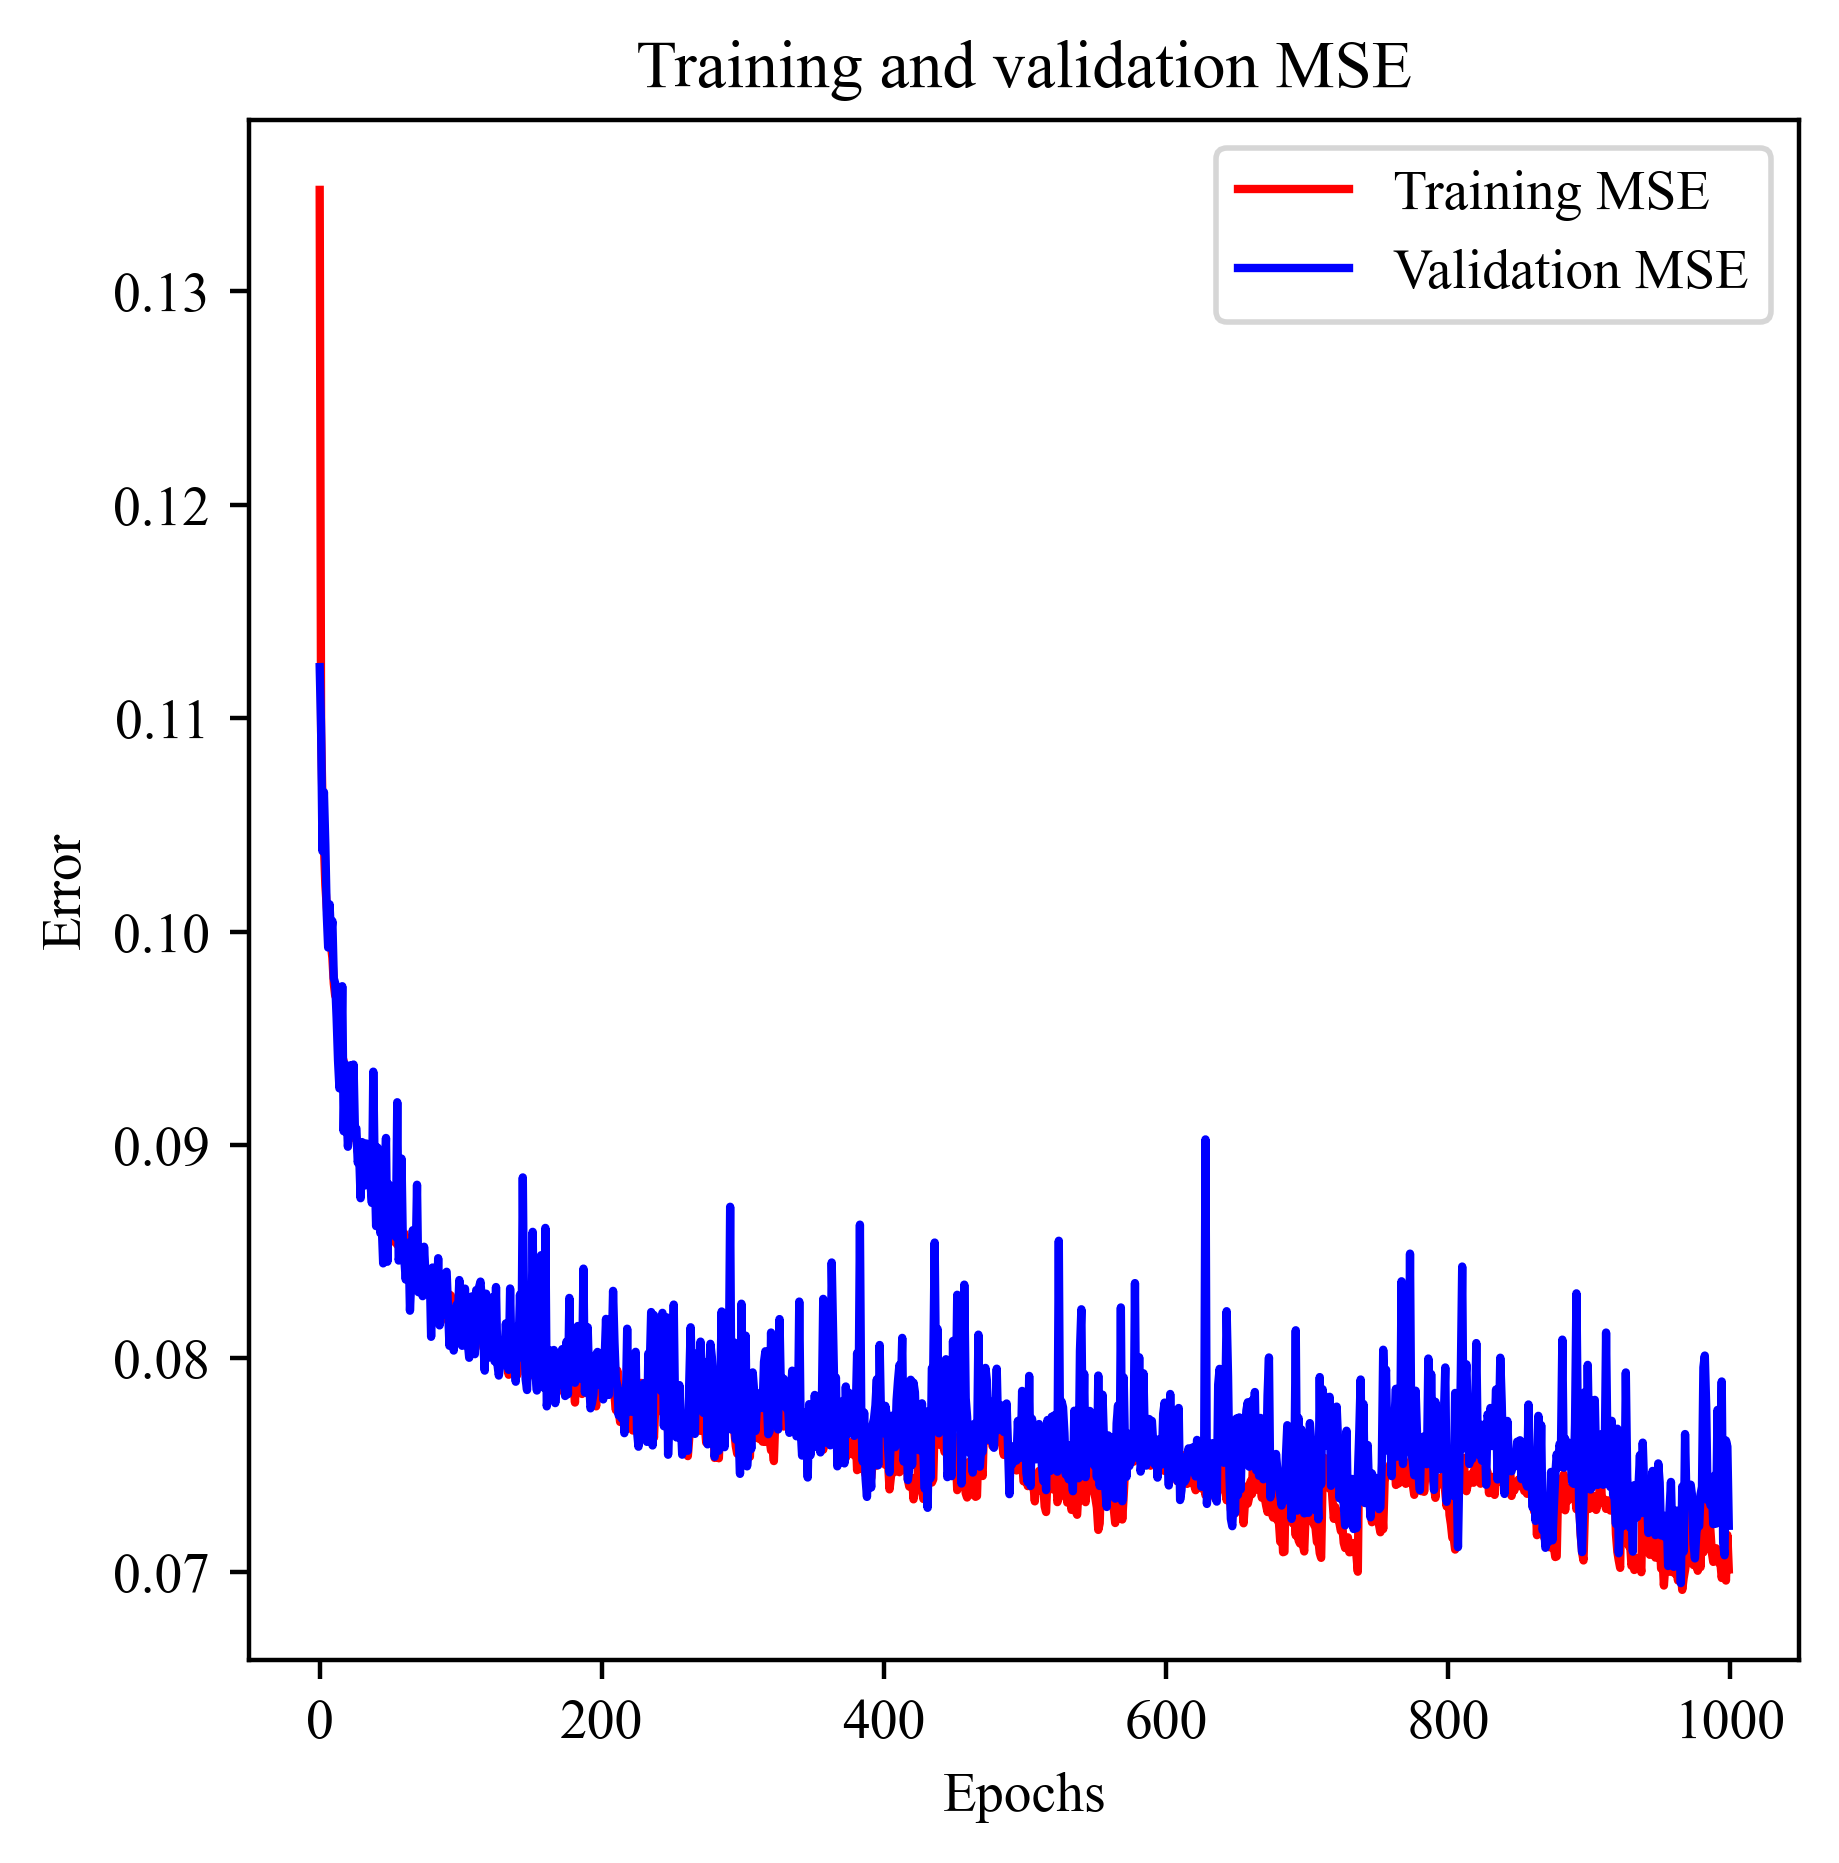

In [ ]:
# CNN 1000 Epochs
plt.figure(facecolor = 'white',figsize=(xw,yw),dpi=dpi)
plt.plot(epochs, MAE, 'r', label='Training MAE')
plt.plot(epochs, val_MAE, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend(loc='upper right')
#-------------------------------------------------------
plt.figure(facecolor = 'white',figsize=(xw,yw),dpi=dpi)
plt.plot(epochs, MSE, 'r', label='Training MSE')
plt.plot(epochs, val_MSE, 'b', label='Validation MSE')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend(loc='upper right')
plt.show()

# QQ plots, William's plots, Sobol

In [ ]:
mode=1 # CML ==1 or CNN ==2

if mode==1:
    yy=yts_train
    xx=Xts_train
    yyy=yts_test
    xxx=Xts_test
    nameofflies=u'ΔT(K) - AE of classic models'
    nameofflies2='AE of classic models'
    yyyy=yts
    xxxx=Xs
    yyyyy=yt
    invMe=0
    rf = pickle.load(open('Models\RFR.sav', 'rb'))
    mlp = pickle.load(open('Models\MLPR.sav', 'rb'))
    sv = pickle.load(open('Models\SVR.sav', 'rb'))
    dt = pickle.load(open('Models\DTR.sav', 'rb'))
    ada = pickle.load(open('Models\ADAR.sav', 'rb'))
    m1=1.0
    m2=1.0
    m3=1.0
    m4=1.0
    m5=1.0
    model1=rf
    model2=mlp
    model3=sv
    model4=dt
    model5=ada
    print(rf)
    print(mlp)
    print(sv)
    print(dt)
    print(ada)

elif mode==2:
    yy=y_traincnn
    xx=X_traincnn
    yyy=y_testcnn 
    xxx=X_testcnn
    nameofflies=u'ΔT(K) - CNN model'
    nameofflies2='CNN model'
    yyyy=yts
    xxxx=Xs.reshape(Xs.shape[0], Xs.shape[1],1)
    yyyyy=yt
    invMe=0
    cnn = load_model('Models\CNN.h5')
    model1=cnn
    model2=cnn
    mmm=0.0
    mmmm=1.0
    cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 32)             128       
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 64)             4160      
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 4)                 68        
                                                                 
 dense_3 (Dense)             (None, 1)                 

Train [1.1093079731903366, 3.0197145733637787, 0.960321524752384, 15.232175610288866]
Test [1.4218787799379389, 5.646266068925702, 0.928167312475308, 28.807950175312488]
All [1.1718246482783021, 3.545045995573163, 0.953723127447314, 28.807950175312964]


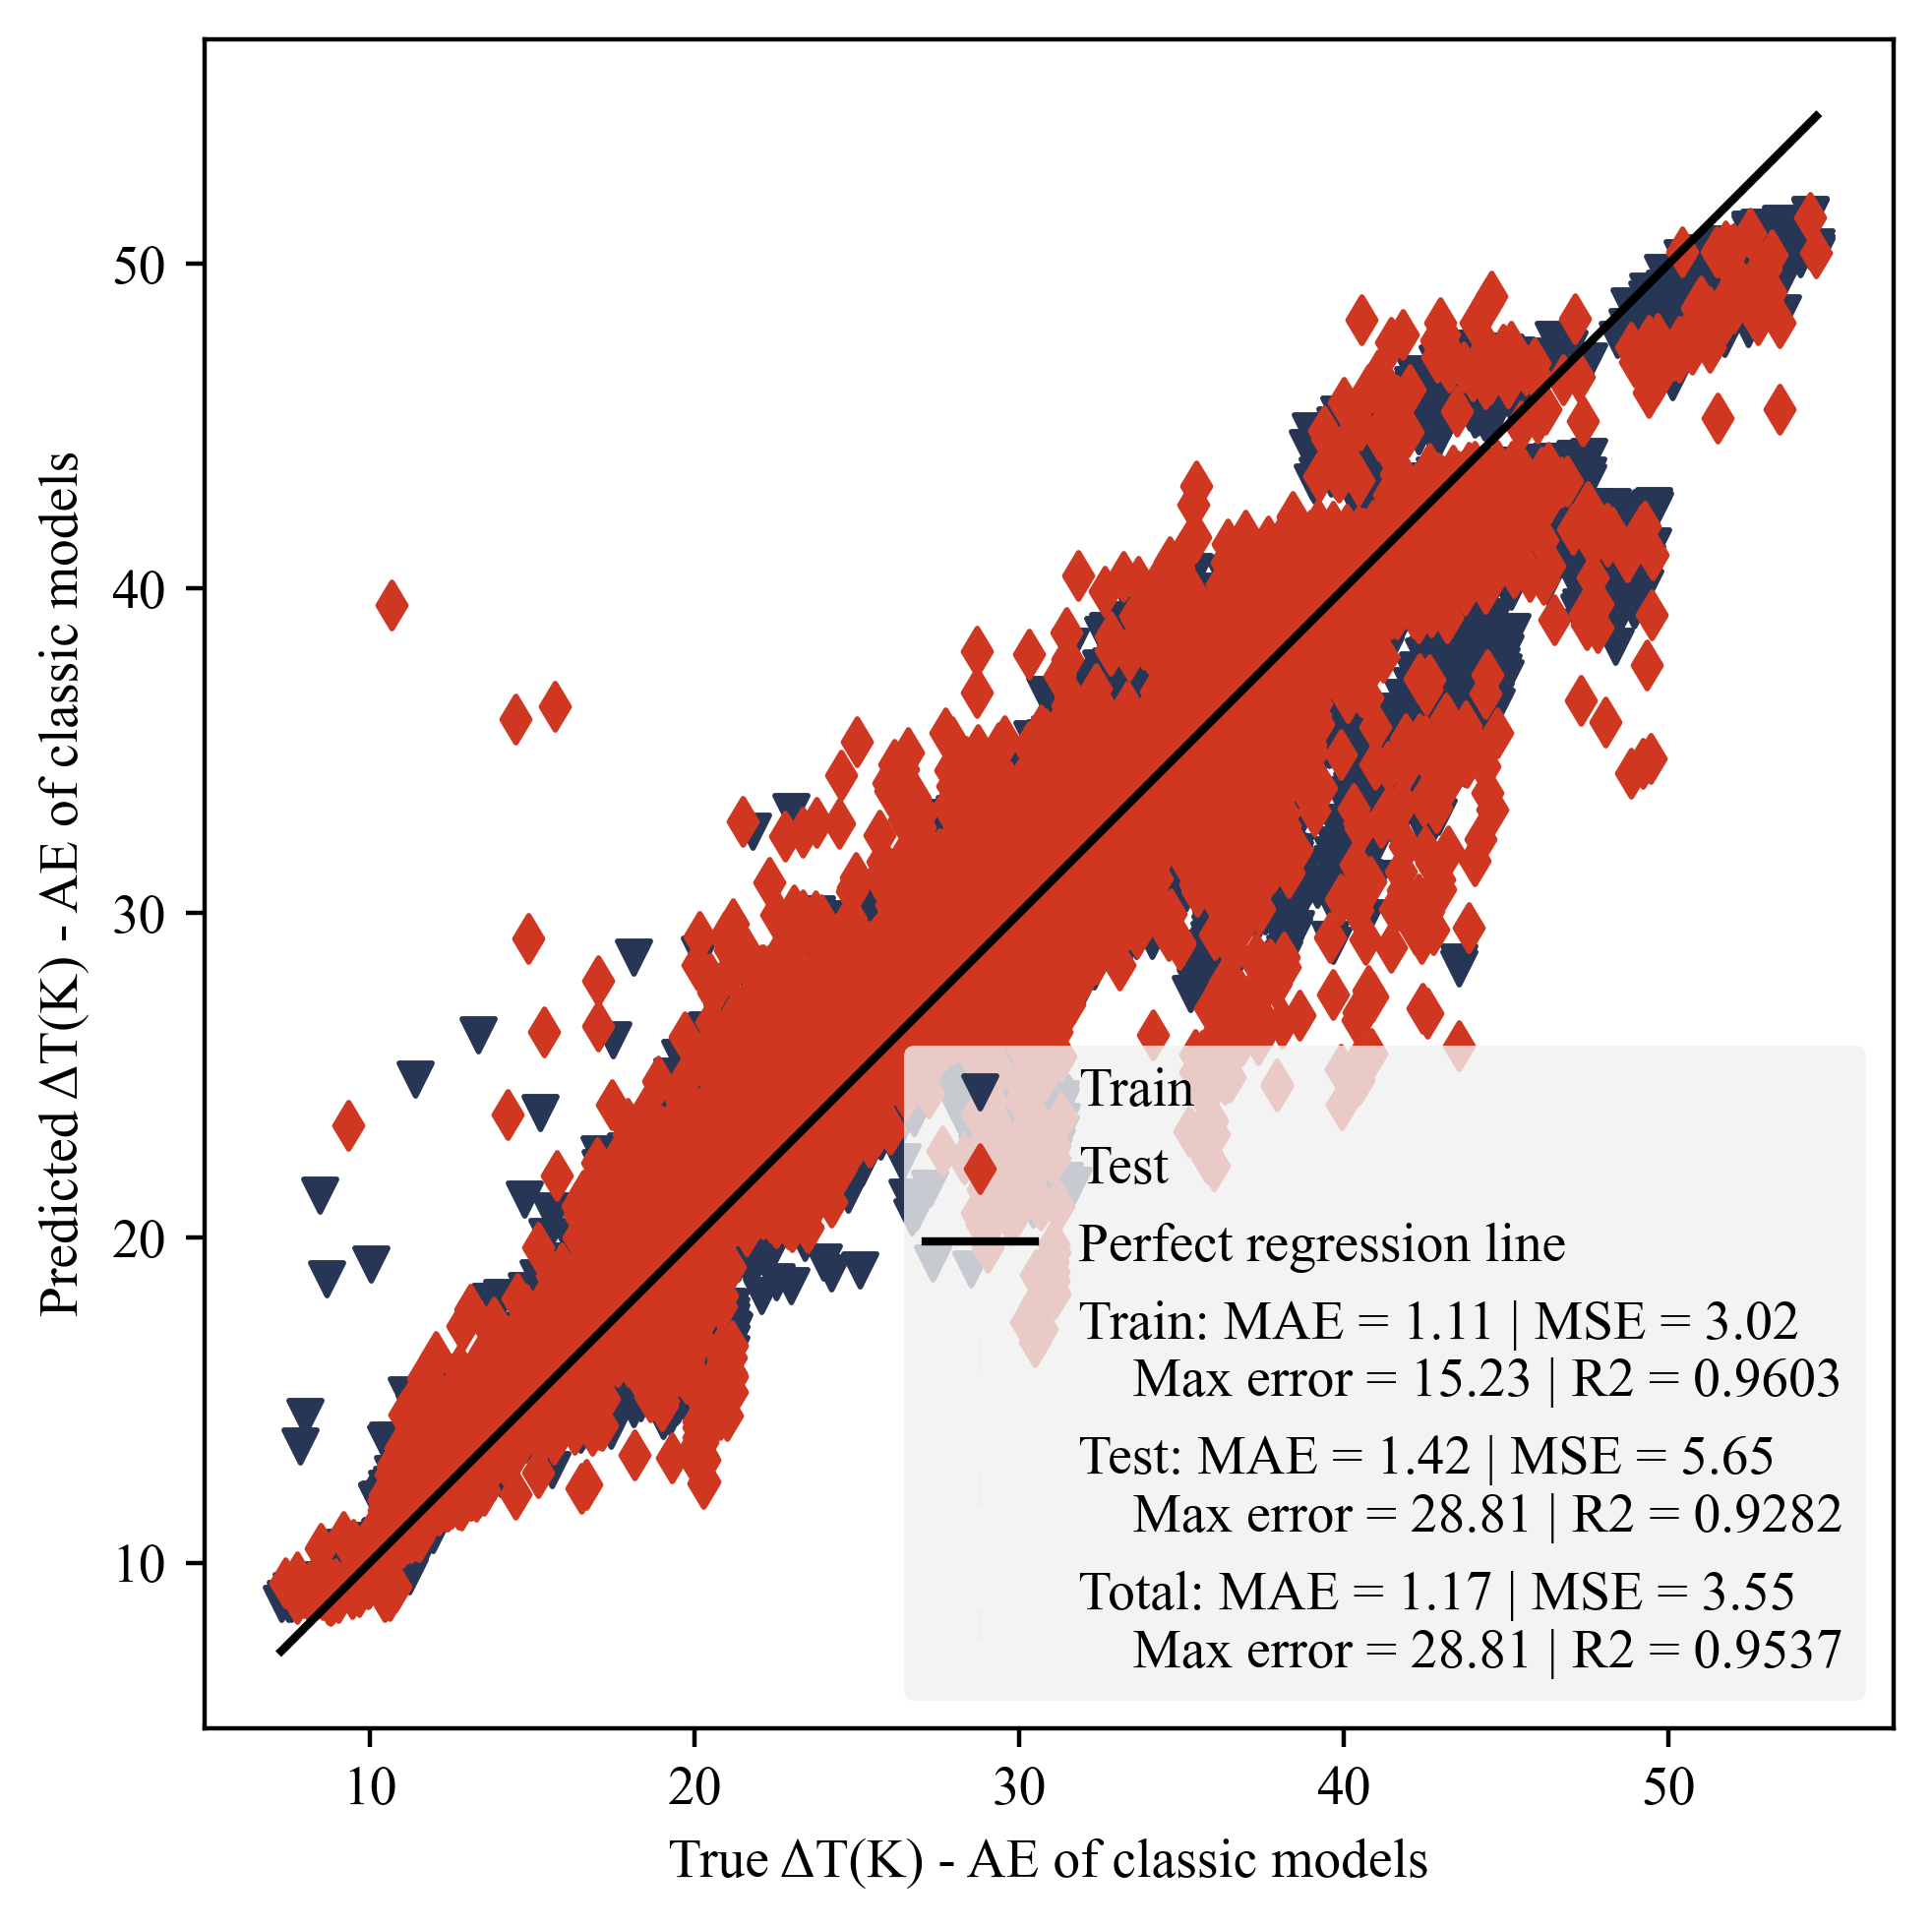

In [17]:
if mode==1:
    fig2 = plt.figure(facecolor = 'white',figsize=(xw,yw),dpi=dpi)
    ax2 = fig2.add_subplot(111)

    xall=xx
    yall=yy
    Number = yall*stdy[invMe]+meany[invMe]
    predicted = (((np.array(model1.predict(xall))*m1+np.array(model2.predict(xall))*m2+np.array(model3.predict(xall))*m3+np.array(model4.predict(xall))*m4+np.array(model5.predict(xall))*m5)/(m1+m2+m3+m4+m5)).reshape(-1, 1))*stdy[invMe]+meany[invMe]


    mae1=mean_absolute_error(Number,predicted)
    mse1=mean_squared_error(Number,predicted)
    r21=r2_score(Number,predicted)
    maxx1=max_error(Number,predicted)
    print('Train',[mae1,mse1,r21,maxx1])

    text1='''Train: MAE = {0} | MSE = {1}
    Max error = {2} | R2 = {3}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(mse1),'%.2f' % Decimal(maxx1),'%.4f' % Decimal(r21))

    ax2.scatter(Number, predicted, marker='v', label = 'Train', c = '#283655')

    storage_train=np.c_[Number,predicted]
    # np.savetxt("CML_TRAIN_{0}.csv".format(nameofflies), storage_train, delimiter=",")
    # np.savetxt("CML_METRICS_TRAIN_{0}.csv".format(nameofflies), [mae1,mse1,r21,maxx1], delimiter=",")

    xall=xxx
    yall=yyy
    Number = yall*stdy[invMe]+meany[invMe]
    predicted = (((np.array(model1.predict(xall))*m1+np.array(model2.predict(xall))*m2+np.array(model3.predict(xall))*m3+np.array(model4.predict(xall))*m4+np.array(model5.predict(xall))*m5)/(m1+m2+m3+m4+m5)).reshape(-1, 1))*stdy[invMe]+meany[invMe]

    
    mae1=mean_absolute_error(Number,predicted)
    mse1=mean_squared_error(Number,predicted)
    r21=r2_score(Number,predicted)
    maxx1=max_error(Number,predicted)
    print('Test',[mae1,mse1,r21,maxx1])

    text2='''Test: MAE = {0} | MSE = {1}
    Max error = {2} | R2 = {3}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(mse1),'%.2f' % Decimal(maxx1),'%.4f' % Decimal(r21))

    ax2.scatter(Number, predicted, marker='d', label = 'Test', c = '#cf3721')

    storage_test=np.c_[Number,predicted]
    # np.savetxt("CML_TEST_{0}.csv".format(nameofflies), storage_train, delimiter=",")
    # np.savetxt("CML_METRICS_TEST_{0}.csv".format(nameofflies), [mae1,mse1,r21,maxx1], delimiter=",")


    xall=xxxx
    yall=yyyy
    Number = yall*stdy[invMe]+meany[invMe]
    predicted = (((np.array(model1.predict(xall))*m1+np.array(model2.predict(xall))*m2+np.array(model3.predict(xall))*m3+np.array(model4.predict(xall))*m4+np.array(model5.predict(xall))*m5)/(m1+m2+m3+m4+m5)).reshape(-1, 1))*stdy[invMe]+meany[invMe]

    Residual = abs(Number-predicted)
    mean = Residual.mean()
    std = Residual.std()
    StdResidual = (Residual - mean)/std

    storage_all=np.c_[Number,predicted,StdResidual]
    mae1=mean_absolute_error(Number,predicted)
    mse1=mean_squared_error(Number,predicted)
    r21=r2_score(Number,predicted)
    maxx1=max_error(Number,predicted)
    print('All',[mae1,mse1,r21,maxx1])

    text3='''Total: MAE = {0} | MSE = {1}
    Max error = {2} | R2 = {3}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(mse1),'%.2f' % Decimal(maxx1),'%.4f' % Decimal(r21))

    ax2.plot(Number, Number, label = 'Perfect regression line', c = 'black', alpha = 1)

    ax2.plot([], [], '|',label=text1, c='#f0f0f0')
    ax2.plot([], [], '|',label=text2, c='#f0f0f0')
    ax2.plot([], [], '|',label=text3, c='#f0f0f0')

    ax2.set_xlabel('True {0}'.format(nameofflies))
    ax2.set_ylabel('Predicted {0}'.format(nameofflies))

    ax2.set_aspect('equal')

    ax2.legend(facecolor = '#f0f0f0', edgecolor = 'None', fontsize = 10)

    fig2.tight_layout()

    # np.savetxt("CML_ALL_{0}.csv".format(nameofflies), storage_train, delimiter=",")
    # np.savetxt("CML_METRICS_ALL_{0}.csv".format(nameofflies), [mae1,mse1,r21,maxx1], delimiter=",")

if mode==1:
    Number = yyyy*stdy[invMe]+meany[invMe]
    ccdp=xxxx
    predicted = ((((np.array(model1.predict(ccdp))*m1+np.array(model2.predict(ccdp))*m2+np.array(model3.predict(ccdp))*m3+np.array(model4.predict(ccdp))*m4+np.array(model5.predict(ccdp))*m5)/(m1+m2+m3+m4+m5)).reshape(-1, 1)))*stdy[invMe]+meany[invMe]
    Residual = abs(Number-predicted)
    mean = Residual.mean()
    std = Residual.std()
    StdResidual = (Residual - mean)/std

if mode==2:
    fig2 = plt.figure(facecolor = 'white',figsize=(xw,yw),dpi=dpi)
    ax2 = fig2.add_subplot(111)

    Number = yy*stdy[invMe]+meany[invMe]
    predicted = (((np.array(model2.predict(xx))*mmm+np.array(model1.predict(xx))*mmmm)/(mmm+mmmm)).reshape(-1, 1))*stdy[invMe]+meany[invMe]

    mae1=mean_absolute_error(Number,predicted)
    mse1=mean_squared_error(Number,predicted)
    r21=r2_score(Number,predicted)
    maxx1=max_error(Number,predicted)
    print('Train',[mae1,mse1,r21,maxx1])

    text1='''Train: MAE = {0} | MSE = {1}
    Max error = {2} | R2 = {3}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(mse1),'%.2f' % Decimal(maxx1),'%.4f' % Decimal(r21))

    ax2.scatter(Number, predicted, marker='v', label = 'Train', c = '#283655')

    storage_train=np.c_[Number,predicted]
    # np.savetxt("CNN_TRAIN_{0}.csv".format(nameofflies), storage_train, delimiter=",")
    # np.savetxt("CNN_METRICS_TRAIN_{0}.csv".format(nameofflies), [mae1,mse1,r21,maxx1], delimiter=",")

    Number = yyy*stdy[invMe]+meany[invMe]
    predicted = (((np.array(model2.predict(xxx))*mmm+np.array(model1.predict(xxx))*mmmm)/(mmm+mmmm)).reshape(-1, 1))*stdy[invMe]+meany[invMe]
    
    mae1=mean_absolute_error(Number,predicted)
    mse1=mean_squared_error(Number,predicted)
    r21=r2_score(Number,predicted)
    maxx1=max_error(Number,predicted)
    print('Test',[mae1,mse1,r21,maxx1])

    text2='''Test: MAE = {0} | MSE = {1}
    Max error = {2} | R2 = {3}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(mse1),'%.2f' % Decimal(maxx1),'%.4f' % Decimal(r21))

    ax2.scatter(Number, predicted, marker='d', label = 'Test', c = '#cf3721')

    storage_test=np.c_[Number,predicted]
    # np.savetxt("CNN_TEST_{0}.csv".format(nameofflies), storage_train, delimiter=",")
    # np.savetxt("CNN_METRICS_TEST_{0}.csv".format(nameofflies), [mae1,mse1,r21,maxx1], delimiter=",")

    
    Number = yyyy*stdy[invMe]+meany[invMe]
    predicted = (((np.array(model2.predict(xxxx))*mmm+np.array(model1.predict(xxxx))*mmmm)/(mmm+mmmm)).reshape(-1, 1))*stdy[invMe]+meany[invMe]
    Residual = abs(Number-predicted)
    mean = Residual.mean()
    std = Residual.std()
    StdResidual = (Residual - mean)/std

    storage_all=np.c_[Number,predicted,StdResidual]
    mae1=mean_absolute_error(Number,predicted)
    mse1=mean_squared_error(Number,predicted)
    r21=r2_score(Number,predicted)
    maxx1=max_error(Number,predicted)
    print('All',[mae1,mse1,r21,maxx1])

    text3='''Total: MAE = {0} | MSE = {1}
    Max error = {2} | R2 = {3}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(mse1),'%.2f' % Decimal(maxx1),'%.4f' % Decimal(r21))

    ax2.plot(Number, Number, label = 'Perfect regression line', c = 'black', alpha = 1)

    ax2.plot([], [], '|',label=text1, c='#f0f0f0')
    ax2.plot([], [], '|',label=text2, c='#f0f0f0')
    ax2.plot([], [], '|',label=text3, c='#f0f0f0')

    ax2.set_xlabel('True {0}'.format(nameofflies))
    ax2.set_ylabel('Predicted {0}'.format(nameofflies))

    ax2.set_aspect('equal')

    ax2.legend(facecolor = '#f0f0f0', edgecolor = 'None', fontsize = 10)

    fig2.tight_layout()

    # np.savetxt("CNN_ALL_{0}.csv".format(nameofflies), storage_train, delimiter=",")
    # np.savetxt("CNN_METRICS_ALL_{0}.csv".format(nameofflies), [mae1,mse1,r21,maxx1], delimiter=",")

0.00048252844907314334


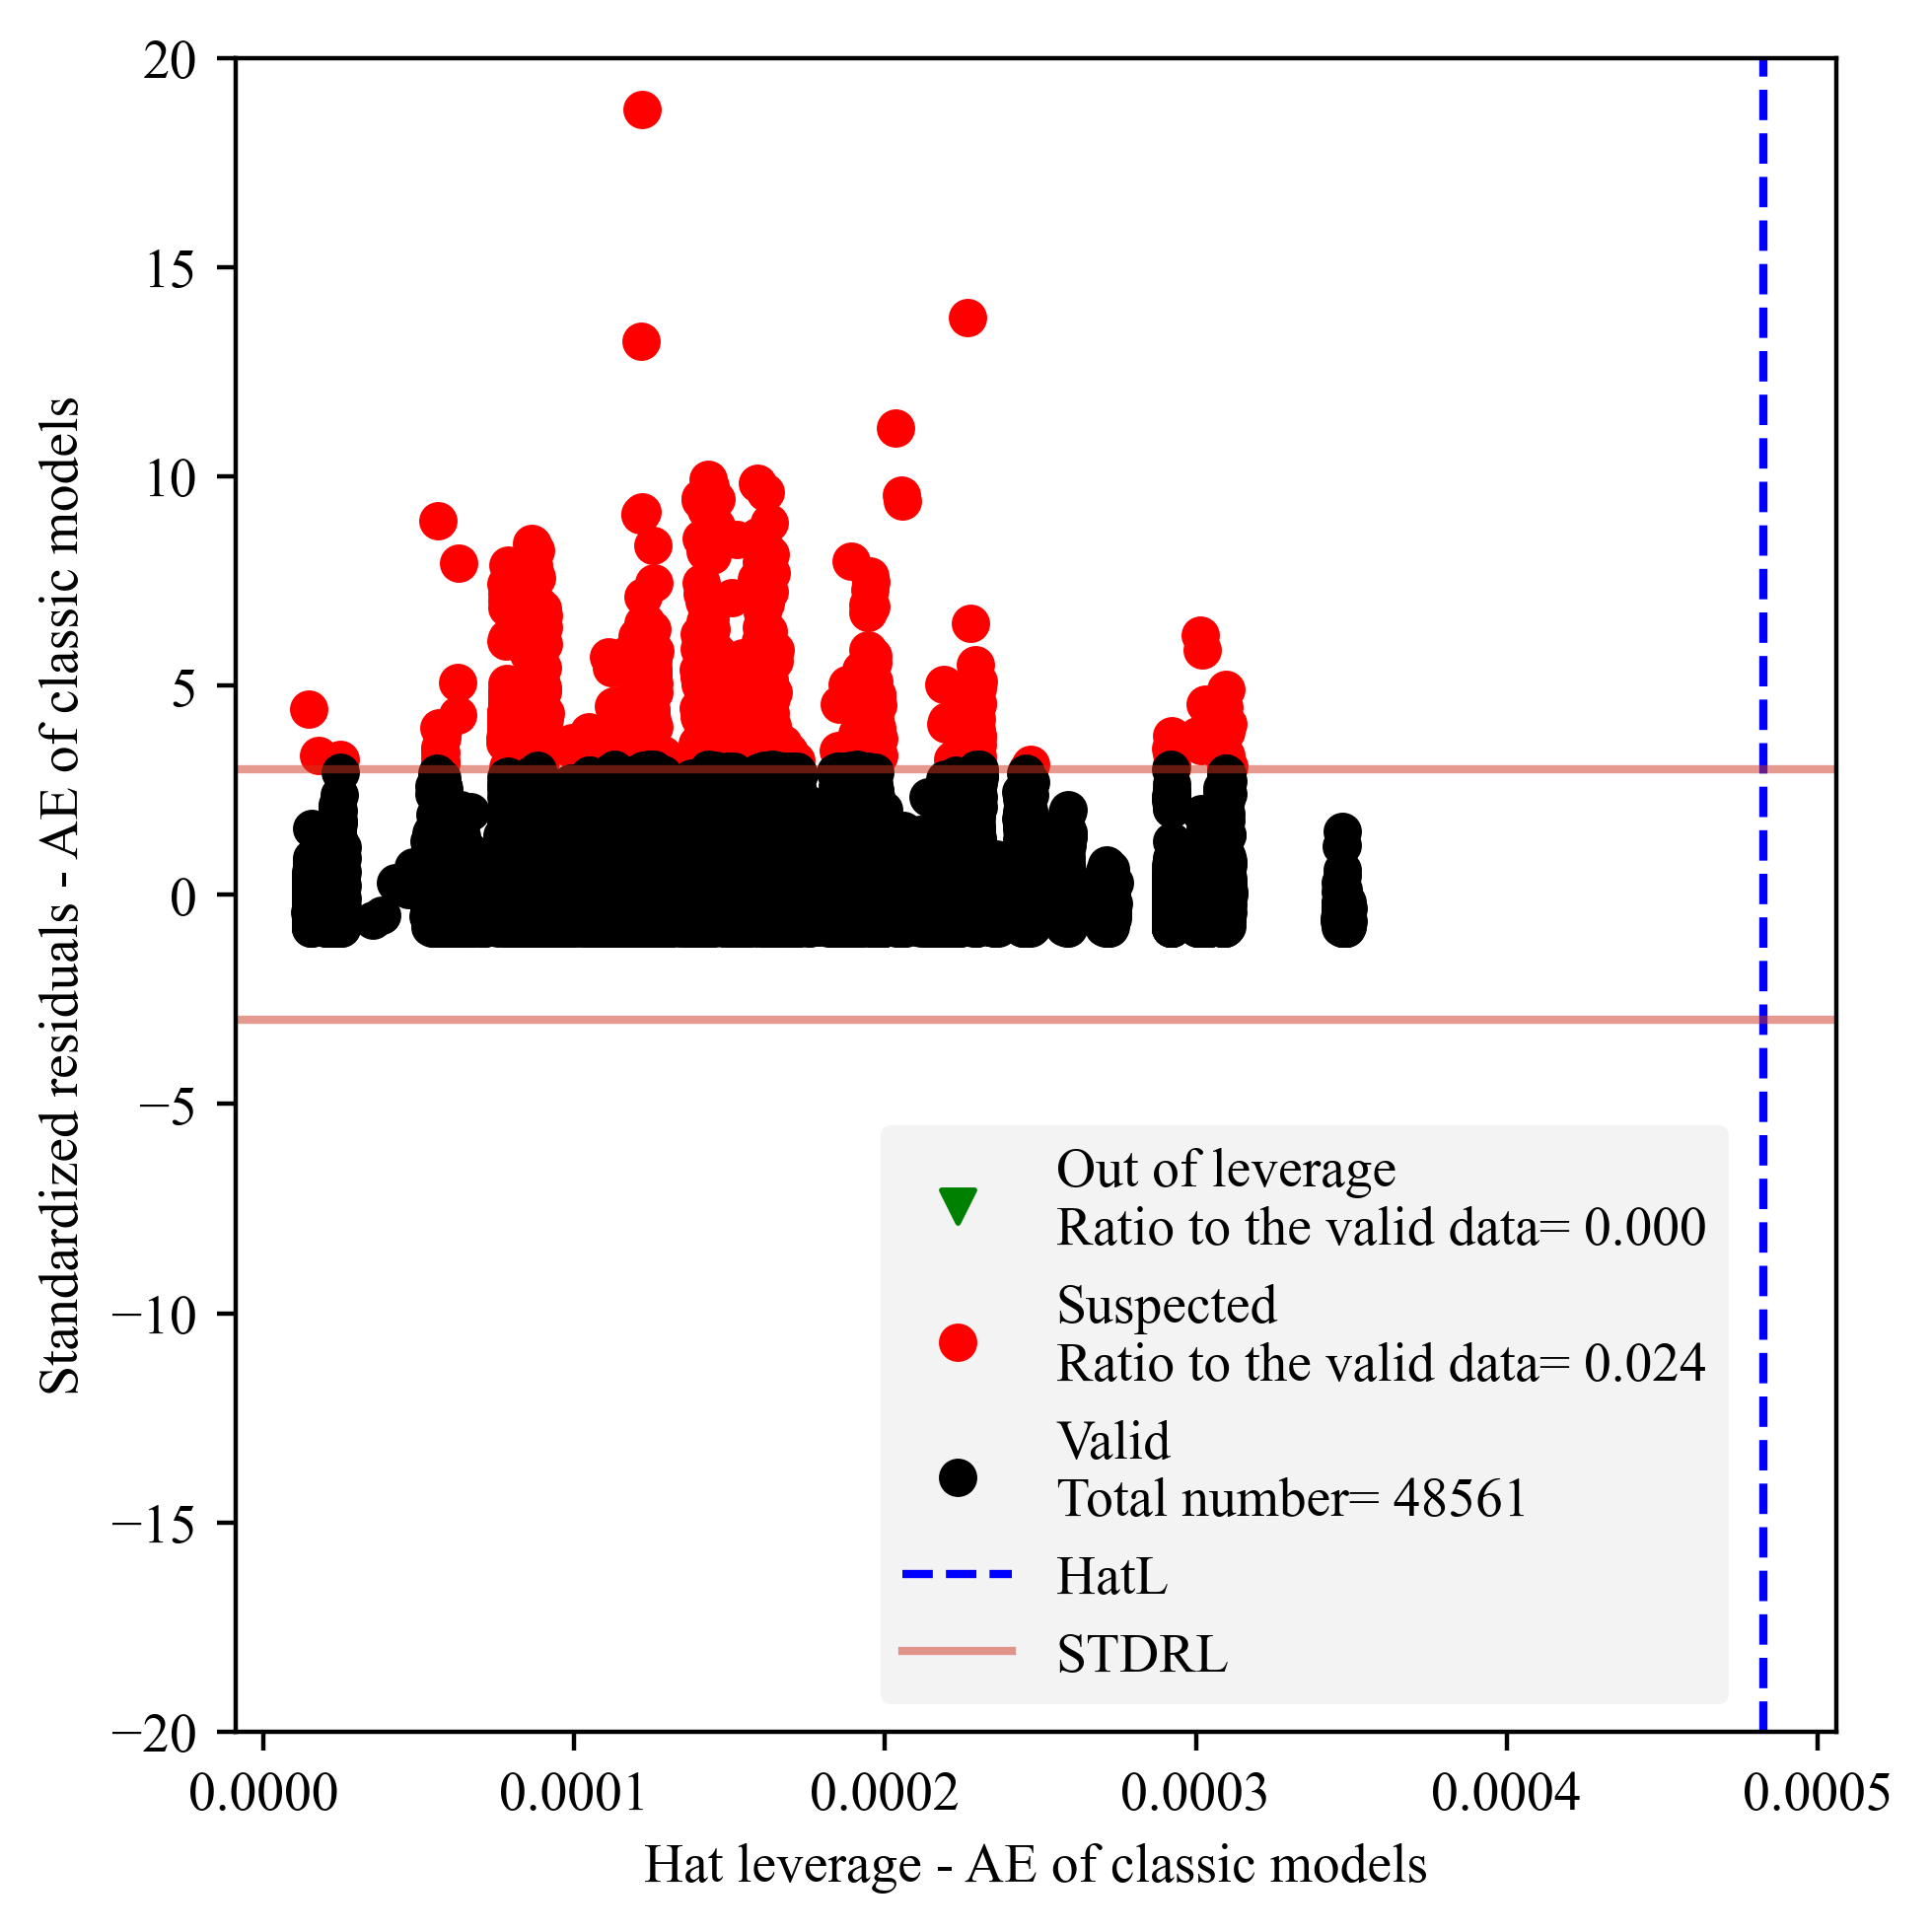

In [12]:
xxxx=xxxx.reshape(xxxx.shape[0],xxxx.shape[1])
standardized_residuals=StdResidual.reshape(-1,1)
xxxx=xxxx*stdX+meanX
AA=xxxx.T.dot(xxxx)
BB=np.linalg.inv(AA)
CC=BB.dot(xxxx.T)
DD=xxxx
EE=(DD*CC.T)
leverage=EE.sum(-1)
lim1=3.0*((xxxx.shape[1]+1)/(xxxx.shape[0]))
print(lim1)
lim2=3
fig3 = plt.figure(facecolor = 'white',figsize=(xw,yw),dpi=dpi)
ax3 = fig3.add_subplot(111)
leverageo=[]
INDXo=[]
standardized_residualso=[]
leverages=[]
INDXs=[]
standardized_residualss=[]
leveragev=[]
INDXv=[]
standardized_residualsv=[]
for i in range(len(leverage)):
    if leverage[i] >lim1:
        leverageo=np.append(leverageo,leverage[i])
        standardized_residualso=np.append(standardized_residualso,standardized_residuals[i])
        INDXo=np.append(INDXo,i)
    elif standardized_residuals[i] >lim2 or standardized_residuals[i] <-lim2:
        leverages=np.append(leverages,leverage[i])
        standardized_residualss=np.append(standardized_residualss,standardized_residuals[i])
        INDXs=np.append(INDXs,i)       
    else:
        leveragev=np.append(leveragev,leverage[i])
        standardized_residualsv=np.append(standardized_residualsv,standardized_residuals[i])
        INDXv=np.append(INDXv,i)

INDXo=np.array(INDXo)
INDXv=np.array(INDXv)
INDXs=np.array(INDXs)

text1='''Out of leverage
Ratio to the valid data= {0}'''.format('%.3f' % Decimal(INDXo.shape[0]/INDXv.shape[0]))
text2='''Suspected
Ratio to the valid data= {0}'''.format('%.3f' % Decimal(INDXs.shape[0]/INDXv.shape[0]))
text3='''Valid
Total number= {0}'''.format((INDXv.shape[0]))

ax3.scatter(leverageo,standardized_residualso, marker='v', c = 'green',label=text1)
ax3.scatter(leverages,standardized_residualss, marker='o', c = 'red',label=text2)
ax3.scatter(leveragev,standardized_residualsv, marker='o', c = 'black',label=text3)
ax3.axvline(x=lim1, ymin=0, ymax=1, c = 'blue',linestyle='--',label='HatL')
ax3.axhline(y=lim2, xmin=0, xmax=1, c = '#cf3721', alpha=0.5, label='STDRL')
ax3.axhline(y=-lim2, xmin=0, xmax=1, c = '#cf3721', alpha=0.5)

# nameofflies2='AE of classic models'
ax3.set_xlabel('Hat leverage - {0}'.format(nameofflies2))
ax3.set_ylabel('Standardized residuals - {0}'.format(nameofflies2))
ax3.set_ylim([-20,20])

ax3.legend(facecolor = '#f0f0f0', edgecolor = 'None', fontsize = 10, bbox_to_anchor=(0.95, 0))

fig3.tight_layout()

In [22]:
# Define the model inputs
problem = {
    'num_vars': 4,
    'names': ['U.P.',	'H.h.',	'H.P.',	'ID'],
    'bounds': [[np.min(xxxx[:,0]), np.max(xxxx[:,0])],
               [np.min(xxxx[:,1]), np.max(xxxx[:,1])],
               [np.min(xxxx[:,2]), np.max(xxxx[:,2])],
               [1, 13]]
}
# Generate samples
param_values = saltelli.sample(problem, 128)
storeC=np.zeros(4).reshape(1,4)
storeE=np.array([param_values[:,0],param_values[:,1],param_values[:,2]]).reshape(param_values.shape[0],3)
for xx in range(param_values.shape[0]):
    idin=fix(xx,param_values)
    dump1=encoder(idin)
    storeC[0,0]=(dump1[0,0]-meanX[3])/stdX[3]
    storeC[0,1]=(dump1[0,1]-meanX[4])/stdX[4]
    storeC[0,2]=(dump1[0,2]-meanX[5])/stdX[5]
    storeC[0,3]=(dump1[0,3]-meanX[6])/stdX[6]
    if xx==0:
        storeD=storeC
    if xx>0:
        storeD=np.append(storeD,storeC,axis=0)
param_values=np.c_[storeE,storeD]
Ysensive = np.zeros([param_values.shape[0]])
if mode==2:
    for i in range(Ysensive.shape[0]):
        Ysensive[i] = (((np.array(model2.predict(param_values[i,:].reshape(1, -1),verbose=0))*mmm+np.array(model1.predict(param_values[i,:].reshape(1, -1),verbose=0))*mmmm)/(mmm+mmmm)).reshape(-1, 1))
if mode==1:
    for i in range(Ysensive.shape[0]):
        ccdp=param_values[i,:].reshape(1, -1)
        Ysensive[i] = (((np.array(model1.predict(ccdp))*m1+np.array(model2.predict(ccdp))*m2+np.array(model3.predict(ccdp))*m3+np.array(model4.predict(ccdp))*m4+np.array(model5.predict(ccdp))*m5)/(m1+m2+m3+m4+m5)).reshape(-1, 1))
# Perform analysis
Si = sobol.analyze(problem, Ysensive, print_to_console=True)
# Print the first-order sensitivity indices
print(Si['S1'])

C:\Users\farix\AppData\Local\Temp\ipykernel_17168\221655296.py:11: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 128)
C:\Users\farix\AppData\Local\Temp\ipykernel_17168\221655296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ysensive[i] = (((np.array(model1.predict(ccdp))*m1+np.array(model2.predict(ccdp))*m2+np.array(model3.predict(ccdp))*m3+np.array(model4.predict(ccdp))*m4+np.array(model5.predict(ccdp))*m5)/(m1+m2+m3+m4+m5)).reshape(-1, 1))
C:\Users\farix\AppData\Local\Temp\ipykernel_17168\221655296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Depr

            ST   ST_conf
U.P.  0.239112  0.093588
H.h.  0.453431  0.142838
H.P.  1.291131  0.268392
ID    0.965841  0.165314
            S1   S1_conf
U.P.  0.165746  0.119385
H.h. -0.056437  0.161873
H.P.  0.200809  0.258400
ID    0.218391  0.214339
                    S2   S2_conf
(U.P., H.h.) -0.012039  0.236728
(U.P., H.P.)  0.595510  0.329669
(U.P., ID)   -0.019239  0.305886
(H.h., H.P.) -0.331811  0.317538
(H.h., ID)   -0.129847  0.272429
(H.P., ID)   -0.278648  0.295679
[ 0.16574574 -0.05643664  0.20080929  0.21839087]


C:\Users\farix\AppData\Local\Temp\ipykernel_17168\221655296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ysensive[i] = (((np.array(model1.predict(ccdp))*m1+np.array(model2.predict(ccdp))*m2+np.array(model3.predict(ccdp))*m3+np.array(model4.predict(ccdp))*m4+np.array(model5.predict(ccdp))*m5)/(m1+m2+m3+m4+m5)).reshape(-1, 1))
C:\Users\farix\AppData\Local\Temp\ipykernel_17168\221655296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ysensive[i] = (((np.array(model1.predict(ccdp))*m1+np.array(model2.predict(ccdp))*m2+np.array(model3.predict(ccdp))*m3+np.array(model4.predict(ccdp))*m4+np.array(model5.predict(ccdp))*m5)/(m1+m2+m3+

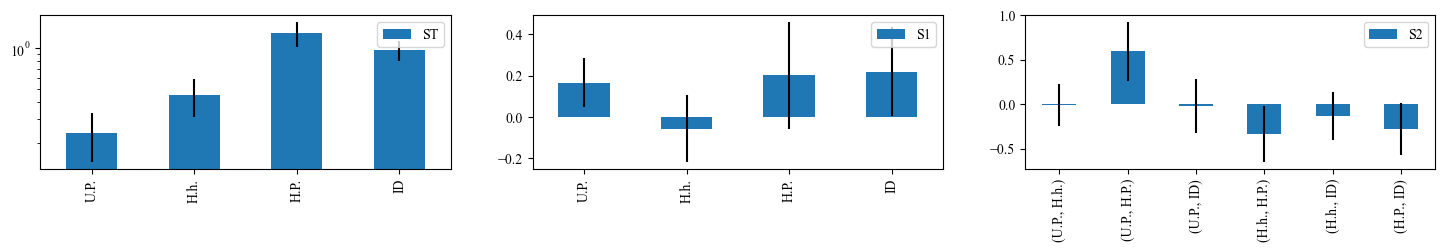

In [23]:
axes = Si.plot()
axes[0].set_yscale('log')
fig = plt.gcf()  # get current figure
fig.set_size_inches(18, 2)
# plt.tight_layout()

# Optimization

In [7]:
bounds=[[(60-meanX[0])/stdX[0], (210-meanX[0])/stdX[0]],
               [(5-meanX[1])/stdX[1], (6-meanX[1])/stdX[1]],
               [(250-meanX[2])/stdX[2], (1000-meanX[2])/stdX[2]],
               [1,13]]

# objective function
def objective(inpu):
    if isinstance(inpu, list):
        tok=1
        inpu = np.array(inpu)
    else:
        tok=0
    param_values=inpu.reshape(1,4)
    storeC=np.zeros(4).reshape(1,4)
    storeE=np.array([param_values[:,0],param_values[:,1],param_values[:,2]]).reshape(param_values.shape[0],3)
    for xx in range(param_values.shape[0]):
        idin=fix(xx,param_values)
        dump1=encoder(idin)
        storeC[0,0]=(dump1[0,0]-meanX[3])/stdX[3]
        storeC[0,1]=(dump1[0,1]-meanX[4])/stdX[4]
        storeC[0,2]=(dump1[0,2]-meanX[5])/stdX[5]
        storeC[0,3]=(dump1[0,3]-meanX[6])/stdX[6]
        if xx==0:
            storeD=storeC
        if xx>0:
            storeD=np.append(storeD,storeC,axis=0)
    param_values=np.c_[storeE,storeD]
    v=param_values
    cnn = load_model('Models\CNN.h5')
    model1=cnn
    model2=cnn
    mmm=0.0
    mmmm=1.0
    invMe=0
    v=v.reshape(1,7,1)
    computedR=np.round((((np.array(model2.predict(v,verbose=0))*mmm+np.array(model1.predict(v,verbose=0))*mmmm)/(mmm+mmmm))*stdy[invMe]+meany[invMe]).reshape(-1, 1),2)
    
    Q=param_values[:,2]
    Q=Q*stdX[2]+meanX[2]
    if computedR>=0:
        if tok==1:
            return -float(Q / computedR[0, 0])
        else:
            return -(Q/computedR)

In [13]:
result22 = shgo(objective, bounds)
print(result22['x'][0]*stdX[0]+meanX[0],result22['x'][1]*stdX[1]+meanX[1],result22['x'][2]*stdX[2]+meanX[2])
print(int(result22['x'][3]),-result22['fun'])

210.0 6.0 1000.0
1 36.88675682353782


In [14]:
x0=[(100-meanX[0])/stdX[0],
            (6.0-meanX[1])/stdX[1],
            (650-meanX[2])/stdX[2],
            2]
result4=minimize(objective, x0=x0, method='Nelder-Mead',bounds=bounds)
print(result4['x'][0]*stdX[0]+meanX[0],result4['x'][1]*stdX[1]+meanX[1],result4['x'][2]*stdX[2]+meanX[2])
print(int(result4['x'][3]),-result4['fun'])

92.27755181668493 6.0 678.555285370848
1 29.285942301964088


In [ ]:
# Baysian
from skopt import gp_minimize

result = gp_minimize(objective,  # Your objective function
                     bounds,    # Bounds for variables
                     n_calls=50,  # Number of evaluations
                     random_state=0)

# Output results
optimized_values = result.x
scaled_values = [optimized_values[i] * stdX[i] + meanX[i] for i in range(3)]
print(*scaled_values, int(result.x[3]), -result.fun)

c:\Users\farix\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [-0.8374818522938766, 1.943044540646674] was inferred to Real(low=-0.8374818522938766, high=1.943044540646674, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(-0.8374818522938766, 1.943044540646674), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
c:\Users\farix\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\space\space.py:116: UserWarning: Dimension [-0.5497510372494517, -0.27512122666628264] was inferred to Real(low=-0.5497510372494517, high=-0.27512122666628264, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(-0.5497510372494517, -0.27512122666628264), prior=None). See the documentation of the check_dimension function for the upcomi

159.90486174406485 6.0 1000.0 12 42.73504343171476


In [ ]:
# Genetic Algorithm
import pygad

# Corrected fitness function
def fitness_function(ga_instance, solution, solution_idx):
    return -objective(solution)[0][0]  # Negative because GA maximizes by default

# Set up PyGAD Genetic Algorithm
ga_instance = pygad.GA(num_generations=50,
                       num_parents_mating=5,
                       fitness_func=fitness_function,
                       sol_per_pop=20,
                       num_genes=4,
                       gene_space=bounds)

# Run the Genetic Algorithm
ga_instance.run()

In [24]:
# Extract and print the best solution
best_solution, best_solution_fitness, _ = ga_instance.best_solution()
scaled_values = [best_solution[i] * stdX[i] + meanX[i] for i in range(3)]
print(*scaled_values, int(best_solution[3]), -best_solution_fitness)

210.0 6.0 1000.0 1 -36.88675682353782


# Steady experiment

In [ ]:
csv_file_name = "Data\Steady\STD"
header_list = ["A","B","C","D","E","F","G","H","I"]
data = pd.read_csv('{file_name}.csv'.format(file_name = csv_file_name), names=header_list).replace('?', np.NaN).dropna(axis=1)
xcxcc = np.array(data.get(["A","B","C","D","E","F","G"]))
xcxcc = filt(xcxcc)
ycycc = np.array(data.get(["H","I"]))
xcxcc = (xcxcc-meanX)/stdX
ycycc = (ycycc-meany)/stdy
X_expcnnn=np.array(xcxcc).reshape(xcxcc.shape[0], xcxcc.shape[1],1)
y_expcnn=np.array(ycycc)[:,0].reshape(-1,1)
cnn = load_model('Models\CNN.h5')
csv_file_name = "Data\Steady\STD"
header_list = ["A","B","C","D","E","F","G","H","I"]
data = pd.read_csv('{file_name}.csv'.format(file_name = csv_file_name), names=header_list).replace('?', np.NaN).dropna()
Xxxxxx = data.get(["A","B","C","D","E","F","G"])
yYYYYYY = data.get(["H","I"])
Xxxxxx=np.array(Xxxxxx)
Xxxxxx = filt(Xxxxxx)
yYYYYYY=np.array(yYYYYYY)
yYYYYYYt=yYYYYYY[:,0].reshape(-1, 1)
Xxxxxx = (Xxxxxx-meanX)/stdX
yYYYYYY = (yYYYYYY-meany)/stdy
yYYYYYYt = yYYYYYY[:,0].reshape(-1,1)
rf = pickle.load(open('Models\RFR.sav', 'rb'))
mlp = pickle.load(open('Models\MLPR.sav', 'rb'))
sv = pickle.load(open('Models\SVR.sav', 'rb'))
dt = pickle.load(open('Models\DTR.sav', 'rb'))
ada = pickle.load(open('Models\ADAR.sav', 'rb'))
m1=1.0
m2=1.0
m3=1.0
m4=1.0
m5=1.0
model1=rf
model2=mlp
model3=sv
model4=dt
model5=ada
invMe=0

AE of classic models  [1.9636040766829406, 7.323099675296581, 0.8975154673759117, 14.515847016707328]
5/5 [==============================] - 0s 2ms/step
CNN  [1.8325910801954675, 6.4817836495489844, 0.9092894269710208, 13.347970581054687]


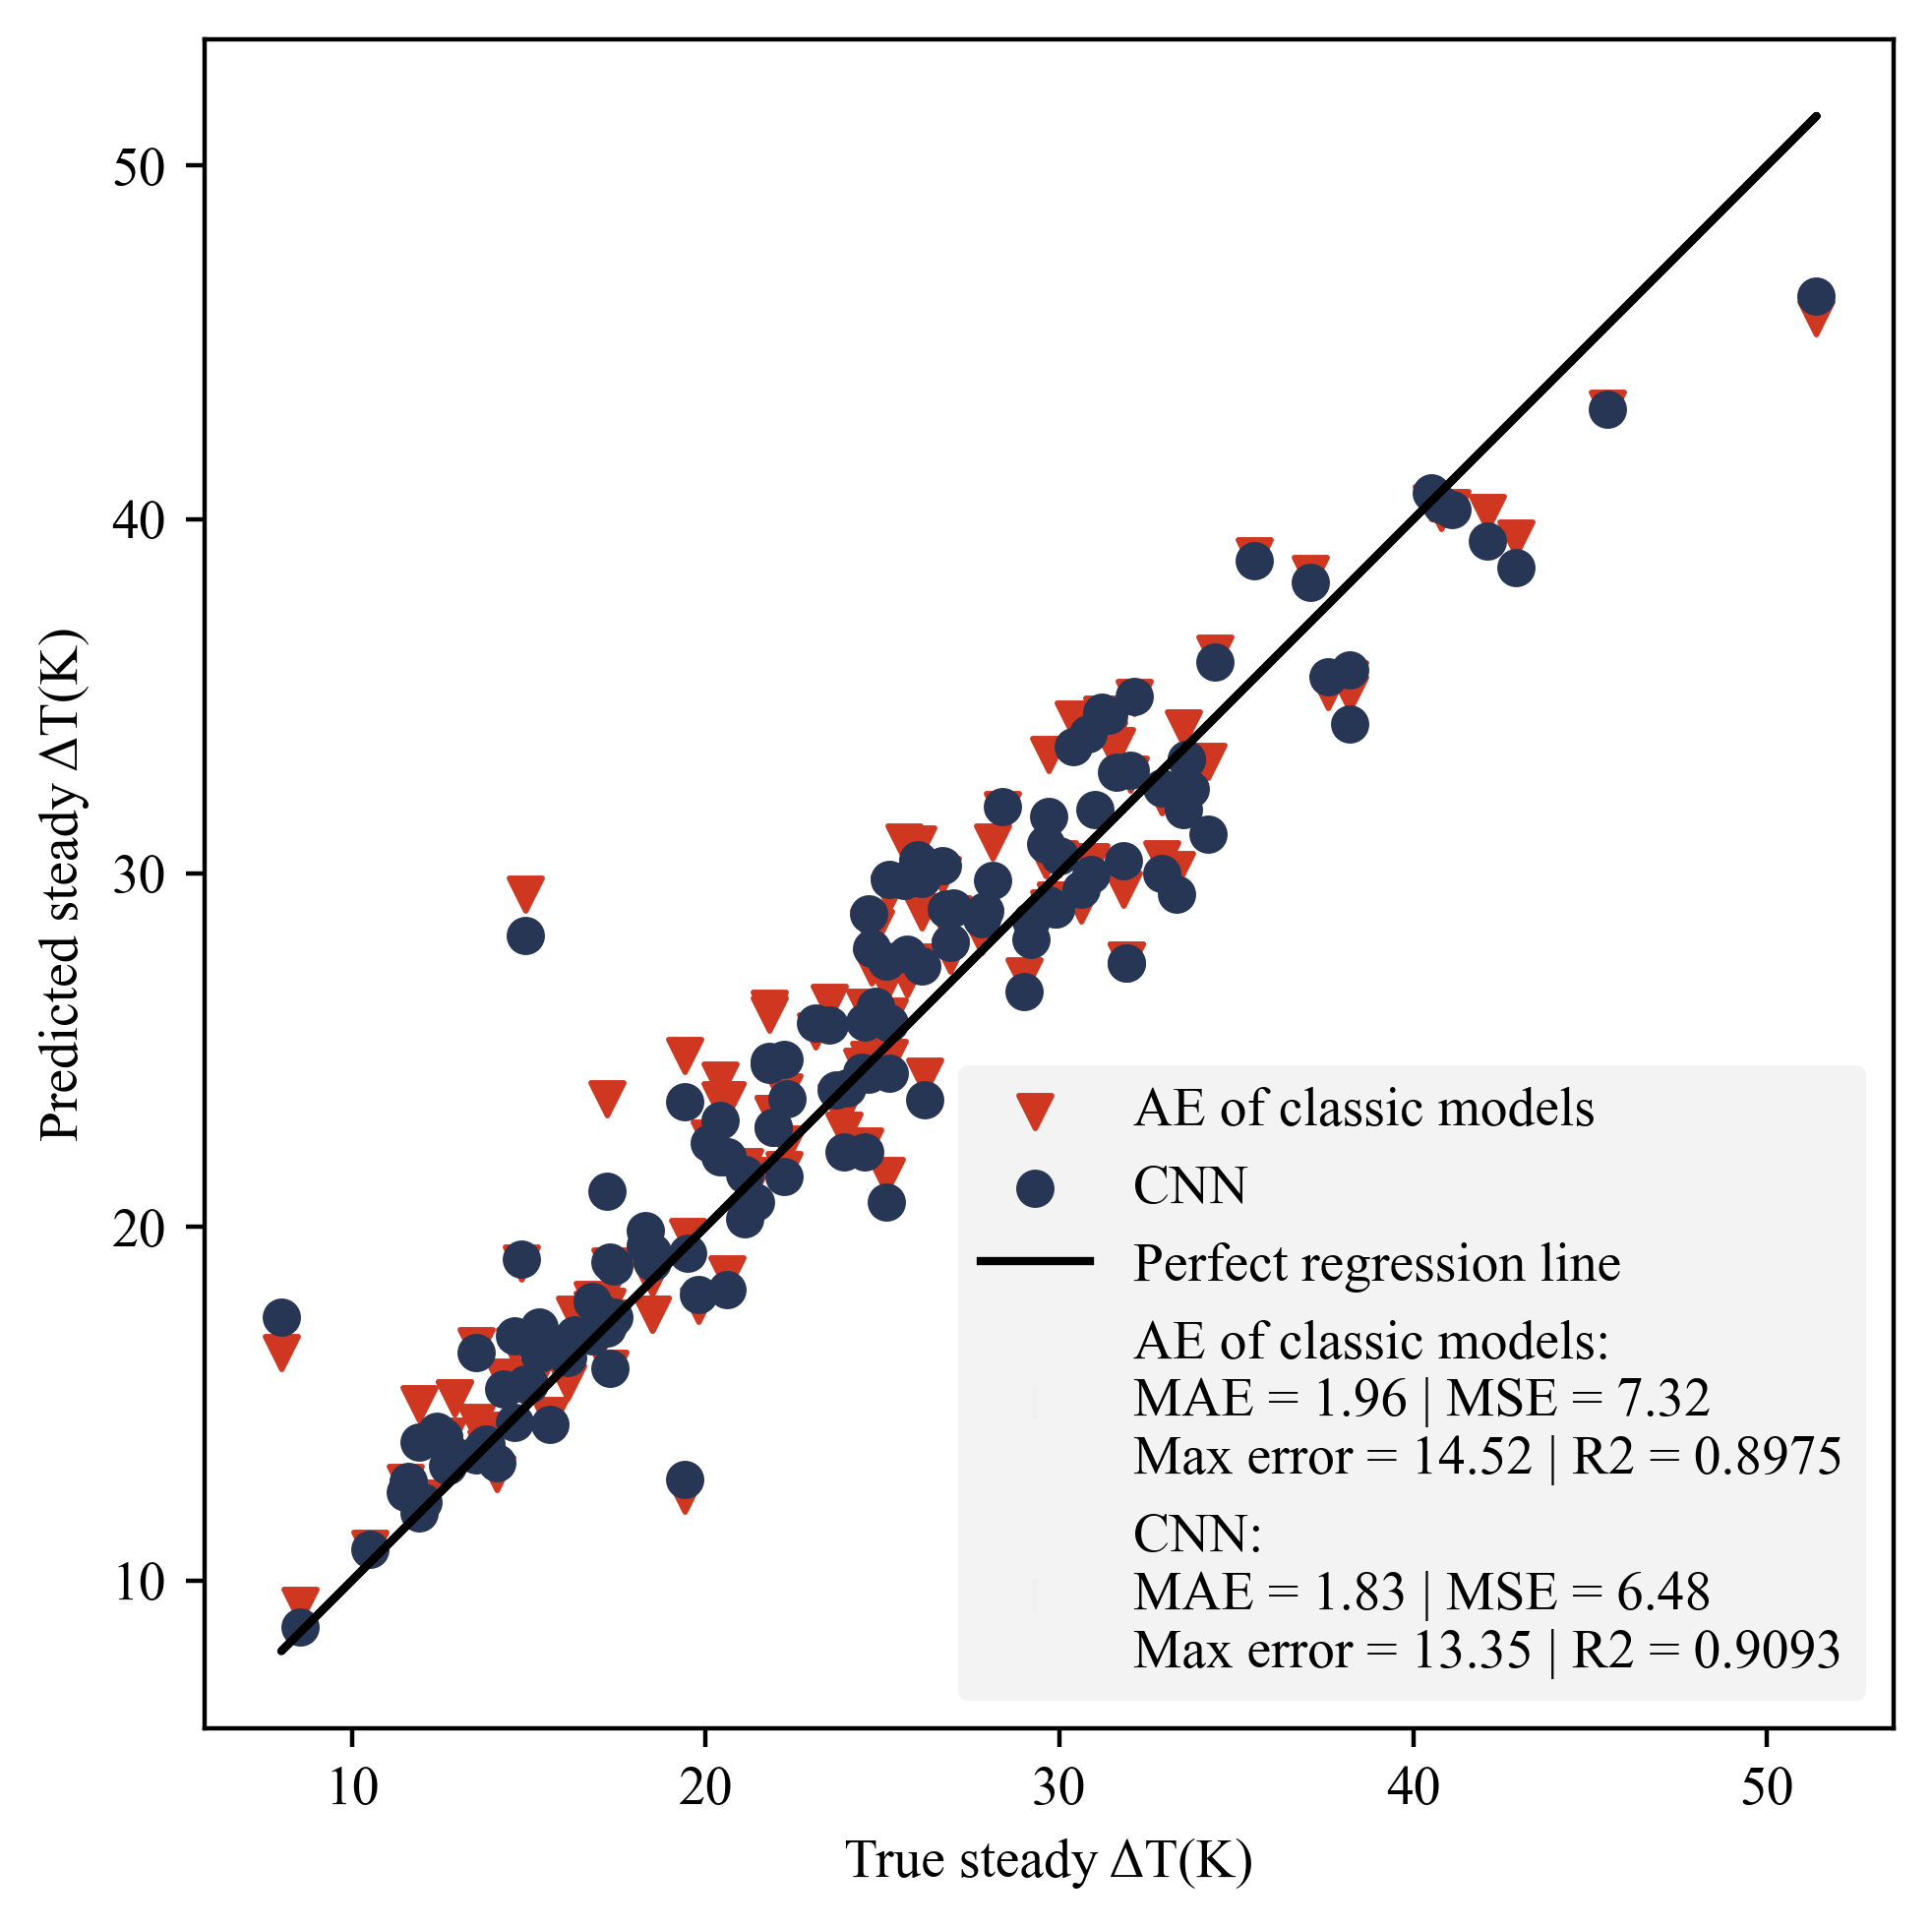

In [15]:
fig2 = plt.figure(facecolor = 'white',figsize=(xw,yw),dpi=dpi)
ax2 = fig2.add_subplot(111)

xall=Xxxxxx
yall=yYYYYYYt
Number = yall*stdy[invMe]+meany[invMe]
predicted = (((np.array(model1.predict(xall))*m1+np.array(model2.predict(xall))*m2+np.array(model3.predict(xall))*m3+np.array(model4.predict(xall))*m4+np.array(model5.predict(xall))*m5)/(m1+m2+m3+m4+m5)).reshape(-1, 1))*stdy[invMe]+meany[invMe]

  
mae1=mean_absolute_error(Number,predicted)
mse1=mean_squared_error(Number,predicted)
r21=r2_score(Number,predicted)
maxx1=max_error(Number,predicted)
print('AE of classic models ',[mae1,mse1,r21,maxx1])

text4='''AE of classic models: 
MAE = {0} | MSE = {1}
Max error = {2} | R2 = {3}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(mse1),'%.2f' % Decimal(maxx1),'%.4f' % Decimal(r21))

ax2.scatter(Number, predicted, marker='v', label = 'AE of classic models', c = '#cf3721')

storage_Experimental_test=np.c_[Number,predicted]
# np.savetxt("CML_STEADY_{0}.csv".format(nameofflies), storage_Experimental_test, delimiter=",")
# np.savetxt("CML_METRICS_STEADY_{0}.csv".format(nameofflies), [mae1,mse1,r21,maxx1], delimiter=",")


xall=X_expcnnn
yall=y_expcnn
Number = yall*stdy[invMe]+meany[invMe]
predicted = ((np.array(cnn.predict(xall))).reshape(-1, 1))*stdy[invMe]+meany[invMe]

  
mae1=mean_absolute_error(Number,predicted)
mse1=mean_squared_error(Number,predicted)
r21=r2_score(Number,predicted)
maxx1=max_error(Number,predicted)
print('CNN ',[mae1,mse1,r21,maxx1])

text5='''CNN: 
MAE = {0} | MSE = {1}
Max error = {2} | R2 = {3}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(mse1),'%.2f' % Decimal(maxx1),'%.4f' % Decimal(r21))

ax2.scatter(Number, predicted, marker='o', label = 'CNN', c = '#283655')

storage_Experimental_test=np.c_[Number,predicted]
# np.savetxt("CNN_STEADY_{0}.csv".format(nameofflies), storage_Experimental_test, delimiter=",")
# np.savetxt("CNN_METRICS_STEADY_{0}.csv".format(nameofflies), [mae1,mse1,r21,maxx1], delimiter=",")


ax2.plot(Number, Number, label = 'Perfect regression line', c = 'black', alpha = 1)

ax2.plot([], [], '|',label=text4, c='#f0f0f0')
ax2.plot([], [], '|',label=text5, c='#f0f0f0')

ax2.set_xlabel(u'True steady ΔT(K)')
ax2.set_ylabel(u'Predicted steady ΔT(K)')

ax2.set_aspect('equal')
plt.rcParams["legend.loc"] = "lower right"
ax2.legend(facecolor = '#f0f0f0', edgecolor = 'None', fontsize = 10 )
fig2.tight_layout()

Classic models  [1.9636040766829406, 7.323099675296583, 0.8975154673759117, 14.515847016707328]
(array([72], dtype=int64),) 14.515847016707328 1.9636040766829406
5/5 [==============================] - 0s 1ms/step
CNN  [1.8325910801954675, 6.4817836495489844, 0.9092894269710208, 13.347970581054687]
(array([72], dtype=int64),) 13.347970581054687 1.8325910801954675


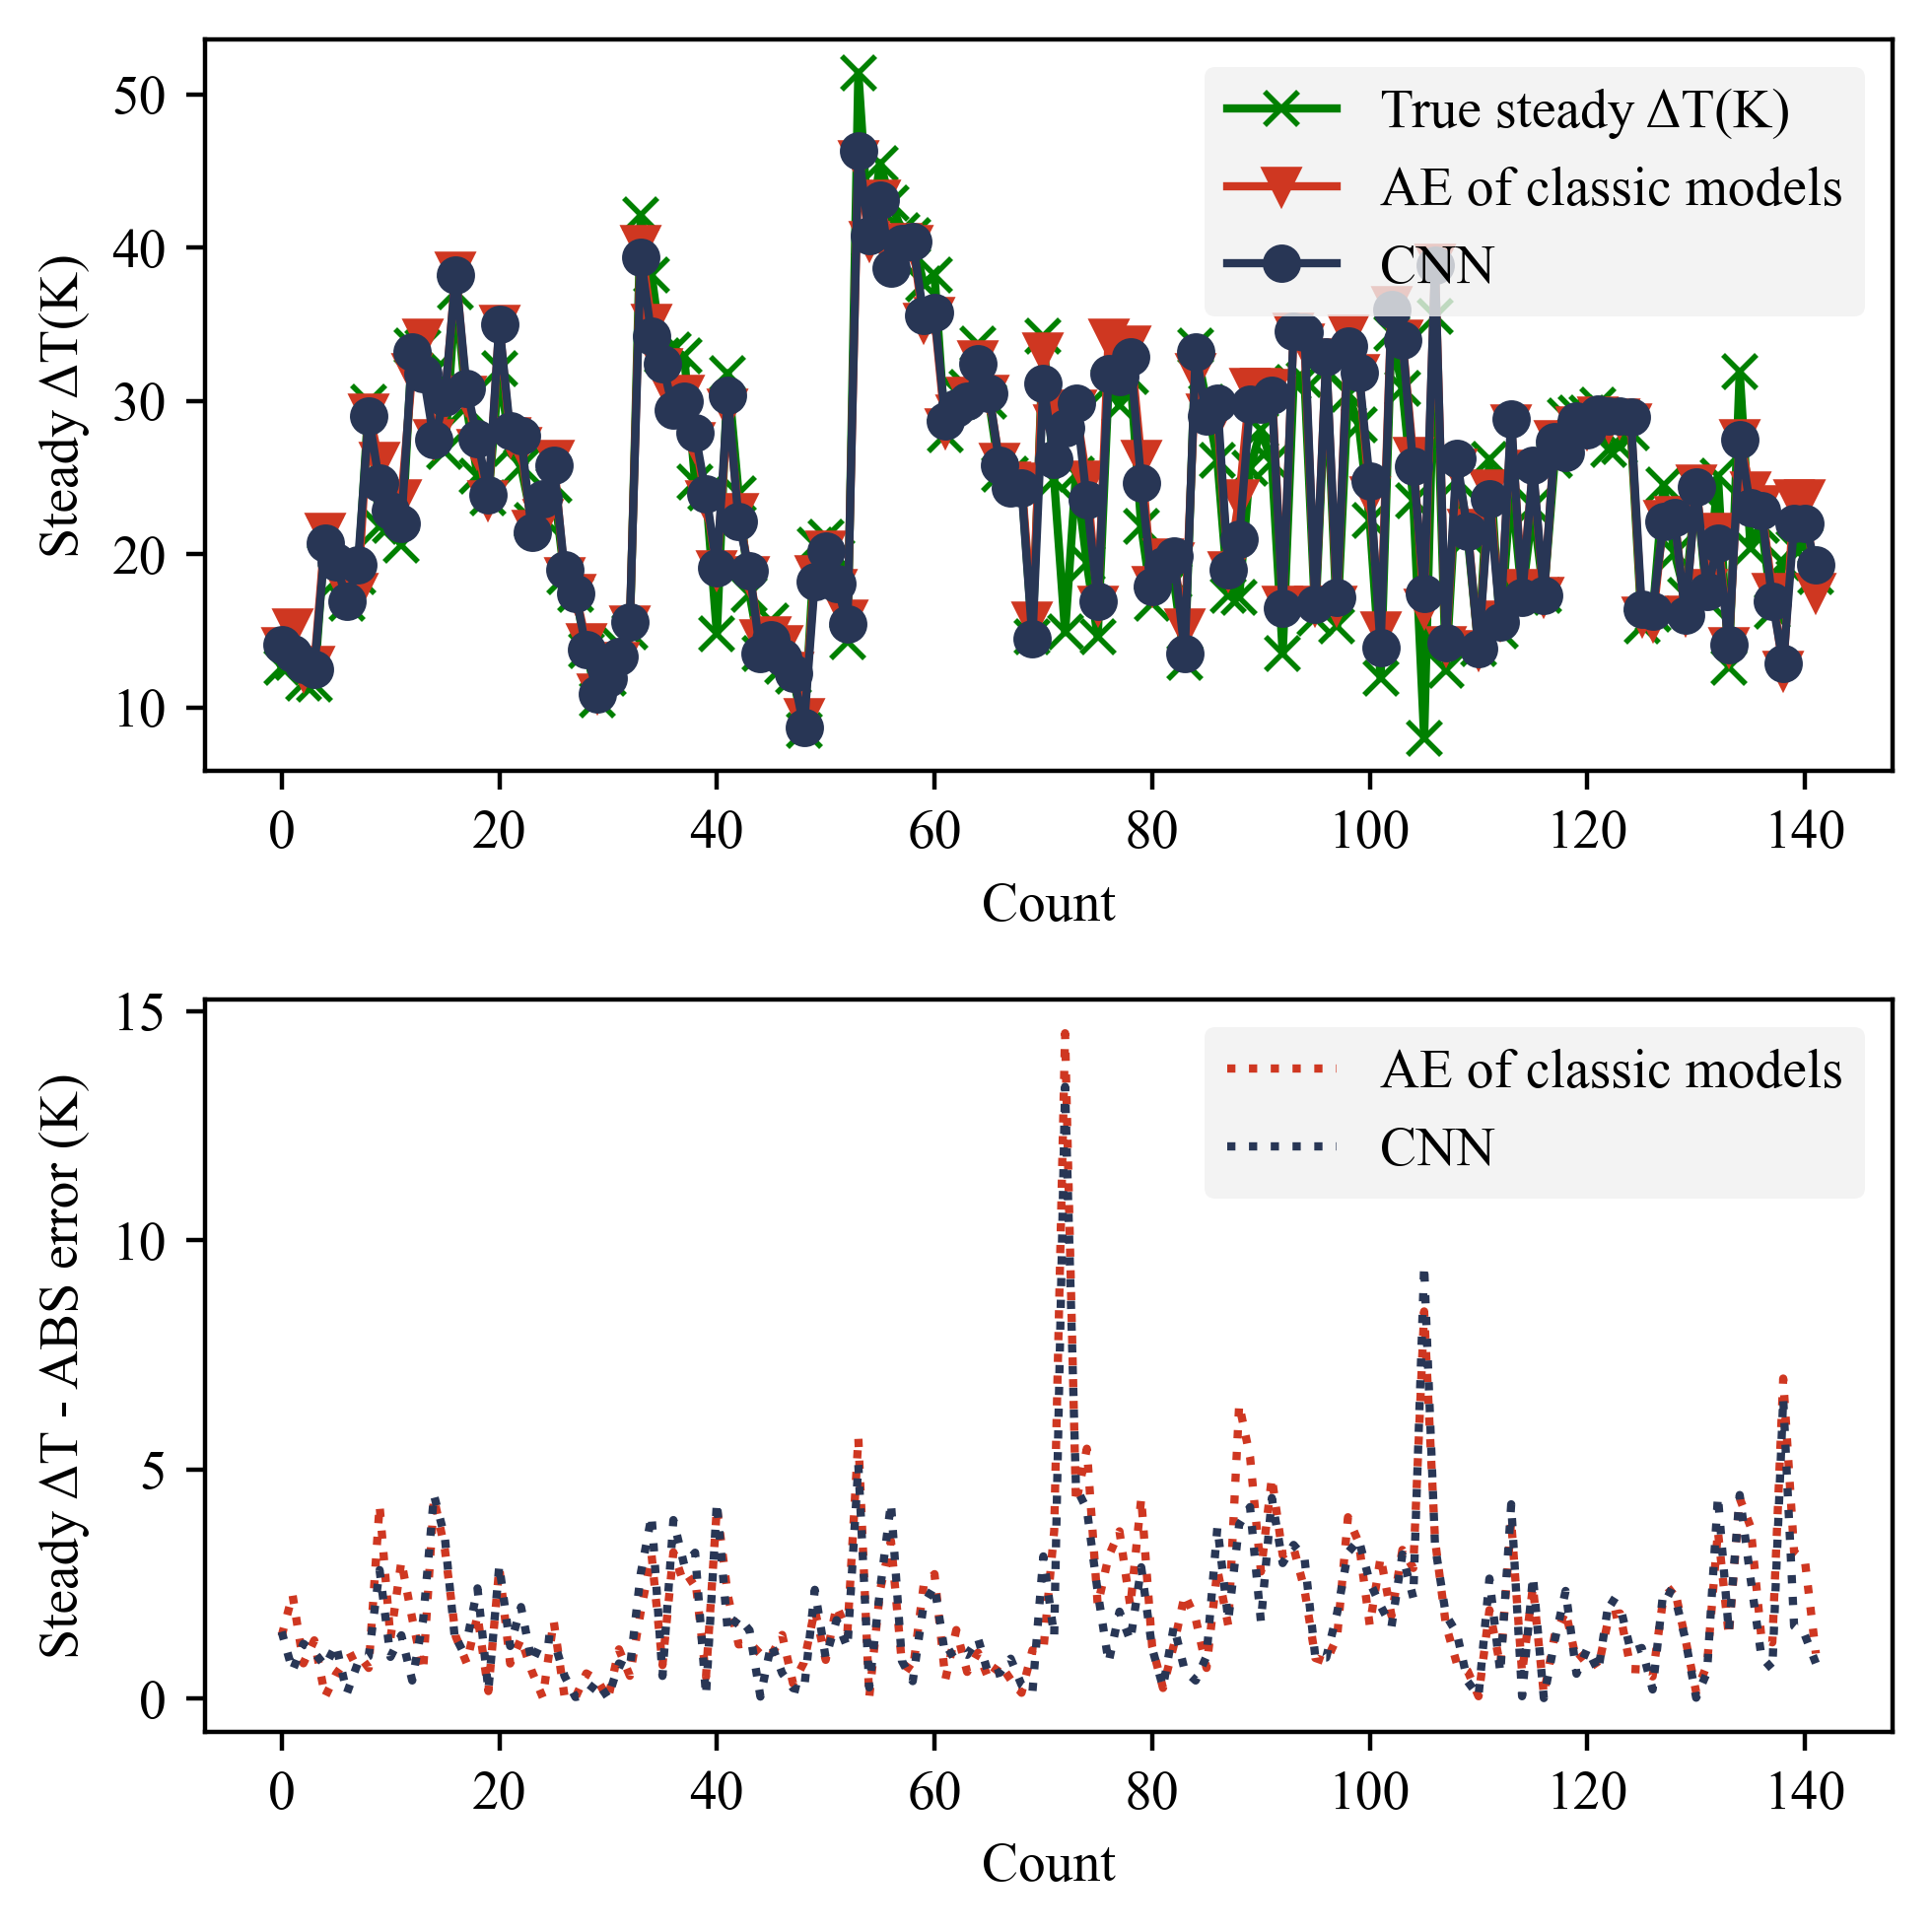

In [18]:
fig2 = plt.figure(facecolor = 'white',figsize=(xw,yw),dpi=dpi)
ax2 = fig2.add_subplot(211)
ax3 = fig2.add_subplot(212)
ssf=5

xall=Xxxxxx
yall=yYYYYYYt
Number = yall*stdy[invMe]+meany[invMe]
predicted = (((np.array(model1.predict(xall))*m1+np.array(model2.predict(xall))*m2+np.array(model3.predict(xall))*m3+np.array(model4.predict(xall))*m4+np.array(model5.predict(xall))*m5)/(m1+m2+m3+m4+m5)).reshape(-1, 1))*stdy[invMe]+meany[invMe]

ax2.plot(range(len(Number)), Number, marker='x', label = u'True steady ΔT(K)', c = 'green', alpha = 1)

  
mae1=mean_absolute_error(Number,predicted)
mse1=mean_squared_error(Number,predicted)
r21=r2_score(Number,predicted)
maxx1=max_error(Number,predicted)
print('Classic models ',[mae1,mse1,r21,maxx1])

text4='''AE of classic models: 
MAE = {0} | MSE = {1}
Max error = {2} | R2 = {3}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(mse1),'%.2f' % Decimal(maxx1),'%.4f' % Decimal(r21))

ax2.plot(np.arange(len(Number)), predicted, marker='v', label = 'AE of classic models', c = '#cf3721')

ii=[]
for value in np.abs(predicted-Number):
    ii.append(value[0])
ax3.plot(np.arange(len(Number)), ii , label = 'AE of classic models', color = '#cf3721', alpha = 1, linestyle='dotted')

print(np.where(ii==np.max(ii)),ii[72],np.mean(ii))

storage_Experimental_test=np.c_[Number,predicted]


xall=X_expcnnn
yall=y_expcnn
Number = yall*stdy[invMe]+meany[invMe]
predicted = ((np.array(cnn.predict(xall))).reshape(-1, 1))*stdy[invMe]+meany[invMe]

  
mae1=mean_absolute_error(Number,predicted)
mse1=mean_squared_error(Number,predicted)
r21=r2_score(Number,predicted)
maxx1=max_error(Number,predicted)
print('CNN ',[mae1,mse1,r21,maxx1])

text5='''CNN: MAE = {0} | MSE = {1}
Max error = {2} | R2 = {3}'''.format('%.2f' % Decimal(mae1),'%.2f' % Decimal(mse1),'%.2f' % Decimal(maxx1),'%.4f' % Decimal(r21))

ax2.plot(np.arange(len(Number)), predicted, marker='o', label = 'CNN', c = '#283655')

ii=[]
for value in np.abs(predicted-Number):
    ii.append(value[0])
ax3.plot(np.arange(len(Number)), ii , label = 'CNN', color = '#283655', alpha = 1, linestyle='dotted')

print(np.where(ii==np.max(ii)),ii[72],np.mean(ii))


storage_Experimental_test=np.c_[Number,predicted]

ax2.set_xlabel('Count')
ax2.set_ylabel(u'Steady ΔT(K)')

ax3.set_xlabel('Count')
ax3.set_ylabel(u'Steady ΔT - ABS error (K)')

plt.rcParams["legend.loc"] = "upper right"
ax2.legend(facecolor = '#f0f0f0', edgecolor = 'None', fontsize = 10)
ax3.legend(facecolor = '#f0f0f0', edgecolor = 'None', fontsize = 10)

fig2.tight_layout()